In [1]:
# !sudo apt-get update
!sudo apt-get install python3-rtree
!sudo pip3 install geopandas descartes shapely ngram # matplotlib==3.1.3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 31 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

In [2]:
from datetime import datetime

t_start = datetime.now()

t_start

datetime.datetime(2021, 4, 20, 1, 41, 58, 15495)

In [3]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  365M    0  365M    0     0  4216k      0 --:--:--  0:01:28 --:--:-- 4342k


In [5]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("accidents.csv", low_memory=False, dtype='object')


In [6]:
df.dtypes

CRASH DATE                       object
CRASH TIME                       object
BOROUGH                          object
ZIP CODE                         object
LATITUDE                         object
LONGITUDE                        object
LOCATION                         object
ON STREET NAME                   object
CROSS STREET NAME                object
OFF STREET NAME                  object
NUMBER OF PERSONS INJURED        object
NUMBER OF PERSONS KILLED         object
NUMBER OF PEDESTRIANS INJURED    object
NUMBER OF PEDESTRIANS KILLED     object
NUMBER OF CYCLIST INJURED        object
NUMBER OF CYCLIST KILLED         object
NUMBER OF MOTORIST INJURED       object
NUMBER OF MOTORIST KILLED        object
CONTRIBUTING FACTOR VEHICLE 1    object
CONTRIBUTING FACTOR VEHICLE 2    object
CONTRIBUTING FACTOR VEHICLE 3    object
CONTRIBUTING FACTOR VEHICLE 4    object
CONTRIBUTING FACTOR VEHICLE 5    object
COLLISION_ID                     object
VEHICLE TYPE CODE 1              object


In [7]:
df.rename(
    {
    "COLLISION_ID": "UNIQUE_KEY",
    "ZIP CODE" : 'ZIPCODE',
    "NUMBER OF PERSONS INJURED": "PERSONS_INJURED",
    "NUMBER OF PERSONS KILLED": "PERSONS_KILLED",
    "NUMBER OF PEDESTRIANS INJURED": "PEDESTRIANS_INJURED",
    "NUMBER OF PEDESTRIANS KILLED": "PEDESTRIANS_KILLED",
    'NUMBER OF MOTORIST INJURED': 'MOTORISTS_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOTORISTS_KILLED', 
    'NUMBER OF CYCLIST INJURED': 'CYCLISTS_INJURED', 
    'NUMBER OF CYCLIST KILLED': 'CYCLISTS_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'CAUSE_VEHICLE_1',
    'CONTRIBUTING FACTOR VEHICLE 2': 'CAUSE_VEHICLE_2',
    'CONTRIBUTING FACTOR VEHICLE 3': 'CAUSE_VEHICLE_3',
    'CONTRIBUTING FACTOR VEHICLE 4': 'CAUSE_VEHICLE_4',
    'CONTRIBUTING FACTOR VEHICLE 5': 'CAUSE_VEHICLE_5',
    'VEHICLE TYPE CODE 1': 'TYPE_VEHICLE_1',
    'VEHICLE TYPE CODE 2': 'TYPE_VEHICLE_2',
    'VEHICLE TYPE CODE 3': 'TYPE_VEHICLE_3',
    'VEHICLE TYPE CODE 4': 'TYPE_VEHICLE_4',
    'VEHICLE TYPE CODE 5': 'TYPE_VEHICLE_5',
    },
    axis = 'columns',
    inplace = True
)

In [8]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
df.columns = cols

In [9]:
df['DATETIME'] = df['CRASH_DATE'] + ' ' + df['CRASH_TIME']
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format="%m/%d/%Y %H:%M")

In [10]:
df.dtypes

CRASH_DATE                     object
CRASH_TIME                     object
BOROUGH                        object
ZIPCODE                        object
LATITUDE                       object
LONGITUDE                      object
LOCATION                       object
ON_STREET_NAME                 object
CROSS_STREET_NAME              object
OFF_STREET_NAME                object
PERSONS_INJURED                object
PERSONS_KILLED                 object
PEDESTRIANS_INJURED            object
PEDESTRIANS_KILLED             object
CYCLISTS_INJURED               object
CYCLISTS_KILLED                object
MOTORISTS_INJURED              object
MOTORISTS_KILLED               object
CAUSE_VEHICLE_1                object
CAUSE_VEHICLE_2                object
CAUSE_VEHICLE_3                object
CAUSE_VEHICLE_4                object
CAUSE_VEHICLE_5                object
UNIQUE_KEY                     object
TYPE_VEHICLE_1                 object
TYPE_VEHICLE_2                 object
TYPE_VEHICLE

In [11]:
!rm accidents.csv

In [12]:
cols = [
    'UNIQUE_KEY',
    'DATETIME',
    'BOROUGH',
    'ZIPCODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'ON_STREET_NAME',
    'CROSS_STREET_NAME',
    'OFF_STREET_NAME',
    'PERSONS_INJURED',
    'PERSONS_KILLED',
    'PEDESTRIANS_INJURED',
    'PEDESTRIANS_KILLED',
    'CYCLISTS_INJURED',
    'CYCLISTS_KILLED',
    'MOTORISTS_INJURED',
    'MOTORISTS_KILLED',
    'CAUSE_VEHICLE_1',
    'CAUSE_VEHICLE_2',
    'CAUSE_VEHICLE_3',
    'CAUSE_VEHICLE_4',
    'CAUSE_VEHICLE_5',
    'TYPE_VEHICLE_1',
    'TYPE_VEHICLE_2',
    'TYPE_VEHICLE_3',
    'TYPE_VEHICLE_4',
    'TYPE_VEHICLE_5',
]

df = df[cols].copy()

In [13]:
df.dtypes

UNIQUE_KEY                     object
DATETIME               datetime64[ns]
BOROUGH                        object
ZIPCODE                        object
LATITUDE                       object
LONGITUDE                      object
LOCATION                       object
ON_STREET_NAME                 object
CROSS_STREET_NAME              object
OFF_STREET_NAME                object
PERSONS_INJURED                object
PERSONS_KILLED                 object
PEDESTRIANS_INJURED            object
PEDESTRIANS_KILLED             object
CYCLISTS_INJURED               object
CYCLISTS_KILLED                object
MOTORISTS_INJURED              object
MOTORISTS_KILLED               object
CAUSE_VEHICLE_1                object
CAUSE_VEHICLE_2                object
CAUSE_VEHICLE_3                object
CAUSE_VEHICLE_4                object
CAUSE_VEHICLE_5                object
TYPE_VEHICLE_1                 object
TYPE_VEHICLE_2                 object
TYPE_VEHICLE_3                 object
TYPE_VEHICLE

## Analysis of Data Types

### Datetime

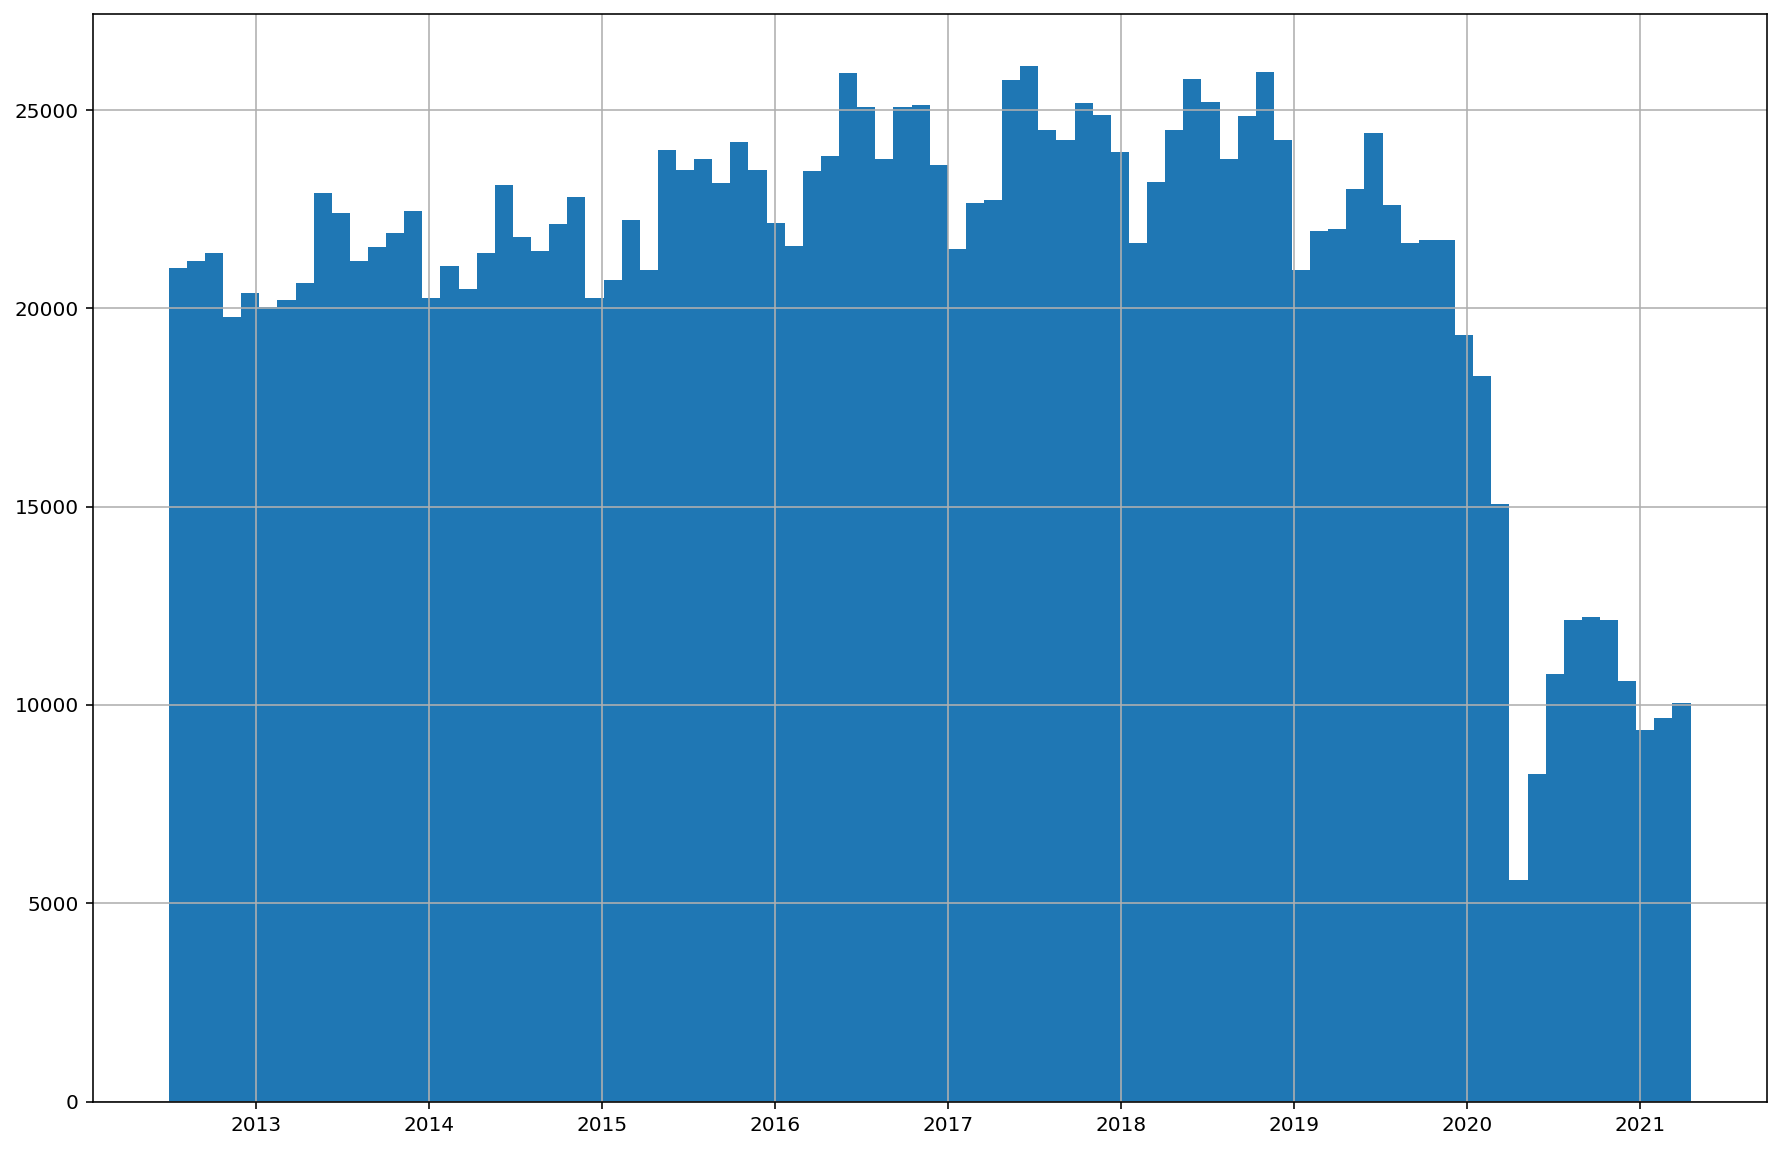

In [14]:
df['DATETIME'].hist(bins=7*12, figsize=(15,10))

In [15]:
# df.drop( ['DATE','TIME'], axis='columns', inplace=True)

### Borough

In [16]:
df['BOROUGH'] = pd.Categorical(df.BOROUGH)

In [17]:
df['BOROUGH'].value_counts()

BROOKLYN         384861
QUEENS           328579
MANHATTAN        285166
BRONX            176387
STATEN ISLAND     51964
Name: BOROUGH, dtype: int64

In [18]:
sum(~df['BOROUGH'].isnull())

1226957

In [19]:
# Significant number of missing values
# We will fix later, by joining with the NYC neighborhood shapefile
sum(df['BOROUGH'].isnull())

544681

### Zip Code

In [20]:
df['ZIPCODE'] = pd.Categorical(df['ZIPCODE'])

In [21]:
# Significant number of missing values
# We will fix later, by joining with the NYC ZIP shapefile
sum(df['ZIPCODE'].isnull())

544893

In [22]:
# We will get back to these columns with geo-shapefiles

### Longitute and Latitude

In [23]:
df.LATITUDE = pd.to_numeric(df.LATITUDE)
df.LONGITUDE  = pd.to_numeric(df.LONGITUDE)

In [24]:
sum(df['LATITUDE'].isnull() | df['LONGITUDE'].isnull())

209511

In [25]:
df['LATITUDE'].fillna(0.0, inplace=True)
df['LONGITUDE'].fillna(0.0, inplace=True)

# We keep LOCATION (which is largely redundant), just to make easy
# analysis of errors later on. 
df.LOCATION = '(' + df.LATITUDE.astype(float).astype(str) + ', ' + df.LONGITUDE.astype(float).astype(str) + ')'

# This is just lon/lat combined, we could drop it, but we will drop it later
# df.drop( ['LOCATION'], axis='columns', inplace=True)

### Numeric Fields

In [26]:
# df['UNIQUE_KEY'] = pd.to_numeric(df['UNIQUE_KEY'], downcast='unsigned')

In [27]:
df['PERSONS_INJURED'].fillna(0, inplace=True)
df['PERSONS_INJURED'] = pd.to_numeric(df['PERSONS_INJURED'], downcast='unsigned')

In [28]:
df['PERSONS_KILLED'].fillna(0, inplace=True)
df['PERSONS_KILLED']  = pd.to_numeric(df['PERSONS_KILLED'], downcast='unsigned')

In [29]:
df['PEDESTRIANS_INJURED'].fillna(0, inplace=True)
df['PEDESTRIANS_INJURED'] = pd.to_numeric(df['PEDESTRIANS_INJURED'], downcast='unsigned')

In [30]:
df['PEDESTRIANS_KILLED'].fillna(0, inplace=True)
df['PEDESTRIANS_KILLED'] = pd.to_numeric(df['PEDESTRIANS_KILLED'], downcast='unsigned')

In [31]:
df['CYCLISTS_INJURED'].fillna(0, inplace=True)
df['CYCLISTS_INJURED'] = pd.to_numeric(df['CYCLISTS_INJURED'], downcast='unsigned')

In [32]:
df['CYCLISTS_KILLED'].fillna(0, inplace=True)
df['CYCLISTS_KILLED'] = pd.to_numeric(df['CYCLISTS_KILLED'], downcast='unsigned')

In [33]:
df['MOTORISTS_INJURED'].fillna(0, inplace=True)
df['MOTORISTS_INJURED'] = pd.to_numeric(df['MOTORISTS_INJURED'], downcast='unsigned')

In [34]:
df['MOTORISTS_KILLED'].fillna(0, inplace=True)
df['MOTORISTS_KILLED'] = pd.to_numeric(df['MOTORISTS_KILLED'], downcast='unsigned')

## Normalizing Causes and Types

In [35]:
df['CAUSE_VEHICLE_1'] = pd.Categorical(df['CAUSE_VEHICLE_1'].str.upper())
df['CAUSE_VEHICLE_2'] = pd.Categorical(df['CAUSE_VEHICLE_2'].str.upper())
df['CAUSE_VEHICLE_3'] = pd.Categorical(df['CAUSE_VEHICLE_3'].str.upper())
df['CAUSE_VEHICLE_4'] = pd.Categorical(df['CAUSE_VEHICLE_4'].str.upper())
df['CAUSE_VEHICLE_5'] = pd.Categorical(df['CAUSE_VEHICLE_5'].str.upper())
df['TYPE_VEHICLE_1'] = pd.Categorical(df['TYPE_VEHICLE_1'].str.upper())
df['TYPE_VEHICLE_2'] = pd.Categorical(df['TYPE_VEHICLE_2'].str.upper())
df['TYPE_VEHICLE_3'] = pd.Categorical(df['TYPE_VEHICLE_3'].str.upper())
df['TYPE_VEHICLE_4'] = pd.Categorical(df['TYPE_VEHICLE_4'].str.upper())
df['TYPE_VEHICLE_5'] = pd.Categorical(df['TYPE_VEHICLE_5'].str.upper())


In [36]:
import numpy as np
df1 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_1', 'TYPE_VEHICLE_1']].copy()
df1['VEHICLE'] = 1
df1.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df2 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_2', 'TYPE_VEHICLE_2']].copy()
df2['VEHICLE'] = 2
df2.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df3 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_3', 'TYPE_VEHICLE_3']].copy()
df3['VEHICLE'] = 3
df3.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df4 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_4', 'TYPE_VEHICLE_4']].copy()
df4['VEHICLE'] = 4
df4.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df5 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_5', 'TYPE_VEHICLE_5']].copy()
df5['VEHICLE'] = 5
df5.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']



In [37]:
concat_df = [df1, df2, df3, df4, df5]
ct_df = pd.concat(concat_df)
ct_df = ct_df.set_index('UNIQUE_KEY')
ct_df = ct_df.sort_values(['UNIQUE_KEY', 'VEHICLE'])
ct_df = ct_df.dropna()

In [38]:
# ct_df['CAUSE'] = pd.Categorical(ct_df['CAUSE'])
# ct_df['VEHICLE_TYPE'] = pd.Categorical(ct_df['VEHICLE_TYPE'])
# ct_df['VEHICLE'] = pd.Categorical(ct_df['VEHICLE'])

In [39]:
# Since we have the ct_df ("causes/types dataframe") we can drop these columns
# from the main dataframe
todrop = [
    'CAUSE_VEHICLE_1', 'TYPE_VEHICLE_1', 
    'CAUSE_VEHICLE_2', 'TYPE_VEHICLE_2',
    'CAUSE_VEHICLE_3', 'TYPE_VEHICLE_3', 
    'CAUSE_VEHICLE_4', 'TYPE_VEHICLE_4',
    'CAUSE_VEHICLE_5', 'TYPE_VEHICLE_5'
]
df.drop(todrop, axis='columns', inplace=True)

## Detecting Inconsistencies

In [40]:
# Incorrect number for injured people
check = (df.PEDESTRIANS_INJURED + df.CYCLISTS_INJURED + df.MOTORISTS_INJURED != df.PERSONS_INJURED)
incorrect_injured = set(df[check].UNIQUE_KEY.values)
len(incorrect_injured)

698

In [41]:
# Incorrect number of people killed
check = ( df.PEDESTRIANS_KILLED + df.CYCLISTS_KILLED + df.MOTORISTS_KILLED != df.PERSONS_KILLED)
incorrect_killed = set(df[check].UNIQUE_KEY.values)
len(incorrect_killed)

14

In [42]:
# No entries for vehicle/cause
nocause = set(df.UNIQUE_KEY.values) -set(ct_df.index.values)
len(nocause)

11774

In [43]:
# Incorrect number of entries for vehicle types/causes 
dd1 = ct_df[['VEHICLE']].groupby('UNIQUE_KEY').count() # number of vehicles involved
dd2 = ct_df[['VEHICLE']].groupby('UNIQUE_KEY').max() # higher number of VEHICLE_NUM
j = dd1.merge(dd2, left_index=True, right_index=True)
j.columns = ['cnt', 'max']
# j.query("cnt != max")

incorrect_vehicles = set(j[j['max'] != j['cnt']].index.values)
len(incorrect_vehicles)

9

In [44]:
todelete = incorrect_injured | incorrect_killed | nocause | incorrect_vehicles

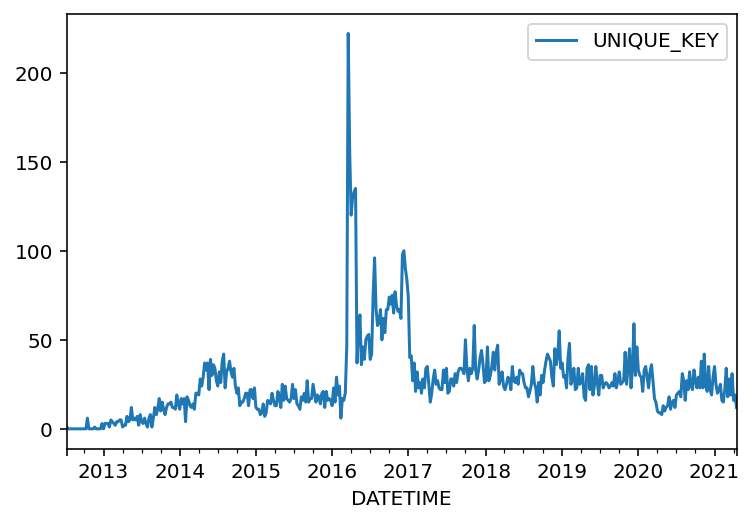

In [45]:
df[ df.UNIQUE_KEY.isin(todelete) ].pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

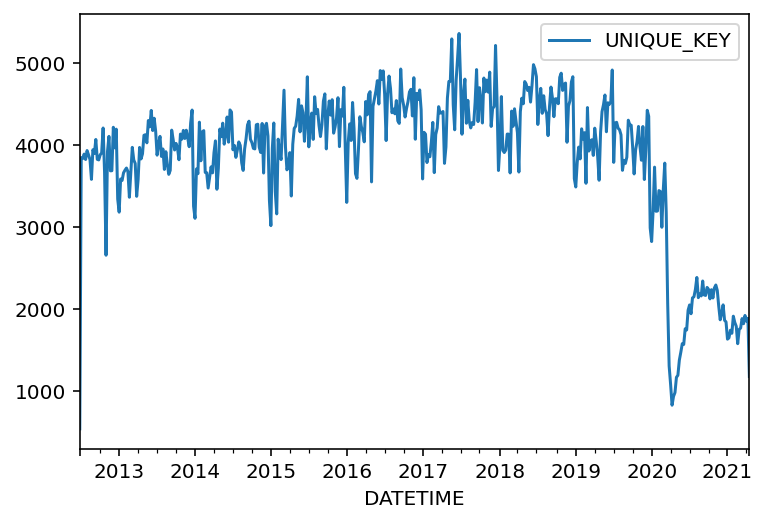

In [46]:
df.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [47]:
df = df[ ~df.UNIQUE_KEY.isin(todelete) ].copy()

## Lon/lat analysis, plus zipcode/borough

In [48]:
# The 'mask' sets rough bound box limits for NYC
mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)


In [49]:
len(df[ ~mask ])

210007

In [50]:
len(df[ mask ])

1549518

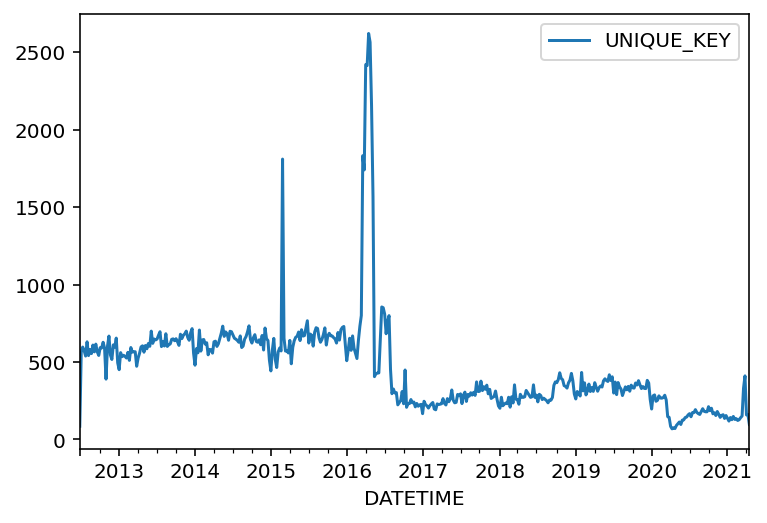

In [51]:
# Check if there is a temporal pattern in the errors
# where lon/lat are clearly not within NYC boundaries
# They are mostly missing ie. location = (0.0,0.0)
# The spikes are visible for the period of Mar-May 2016
# While we will drop these, it would be good to re-examine
# these later on
df[ ~mask ].pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

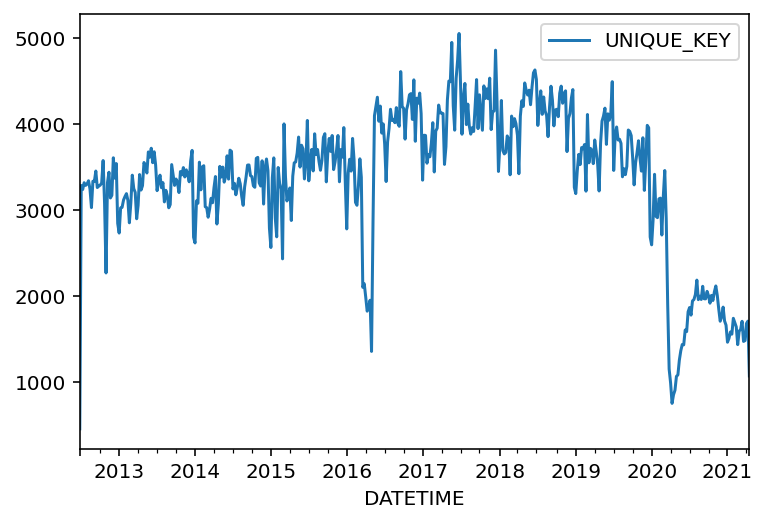

In [52]:
# We have a dillema here: If we drop the incorrect lon/lat values
# then we introduce clear abnormalities in the number of accidents over time
df[ mask ].pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [53]:
# FIXABLE error
# We have lon/lat within the NYC boundaries, but no borough
len(df[ mask & df.BOROUGH.isnull()])

364077

In [54]:
# FIXABLE error
# We have lon/lat within the NYC boundaries, but no ZIP
len(df[ mask & df.ZIPCODE.isnull()])

364272

In [55]:
# No cases where BOROUGH is null but zipcode is not
df[ df.BOROUGH.isnull() & ~df.ZIPCODE.isnull()]

Empty DataFrame
Columns: [UNIQUE_KEY, DATETIME, BOROUGH, ZIPCODE, LATITUDE, LONGITUDE, LOCATION, ON_STREET_NAME, CROSS_STREET_NAME, OFF_STREET_NAME, PERSONS_INJURED, PERSONS_KILLED, PEDESTRIANS_INJURED, PEDESTRIANS_KILLED, CYCLISTS_INJURED, CYCLISTS_KILLED, MOTORISTS_INJURED, MOTORISTS_KILLED]
Index: []

In [56]:
# Small number of cases where the borough is missing but not zip
len(df[ ~df.BOROUGH.isnull() & df.ZIPCODE.isnull() ])

211

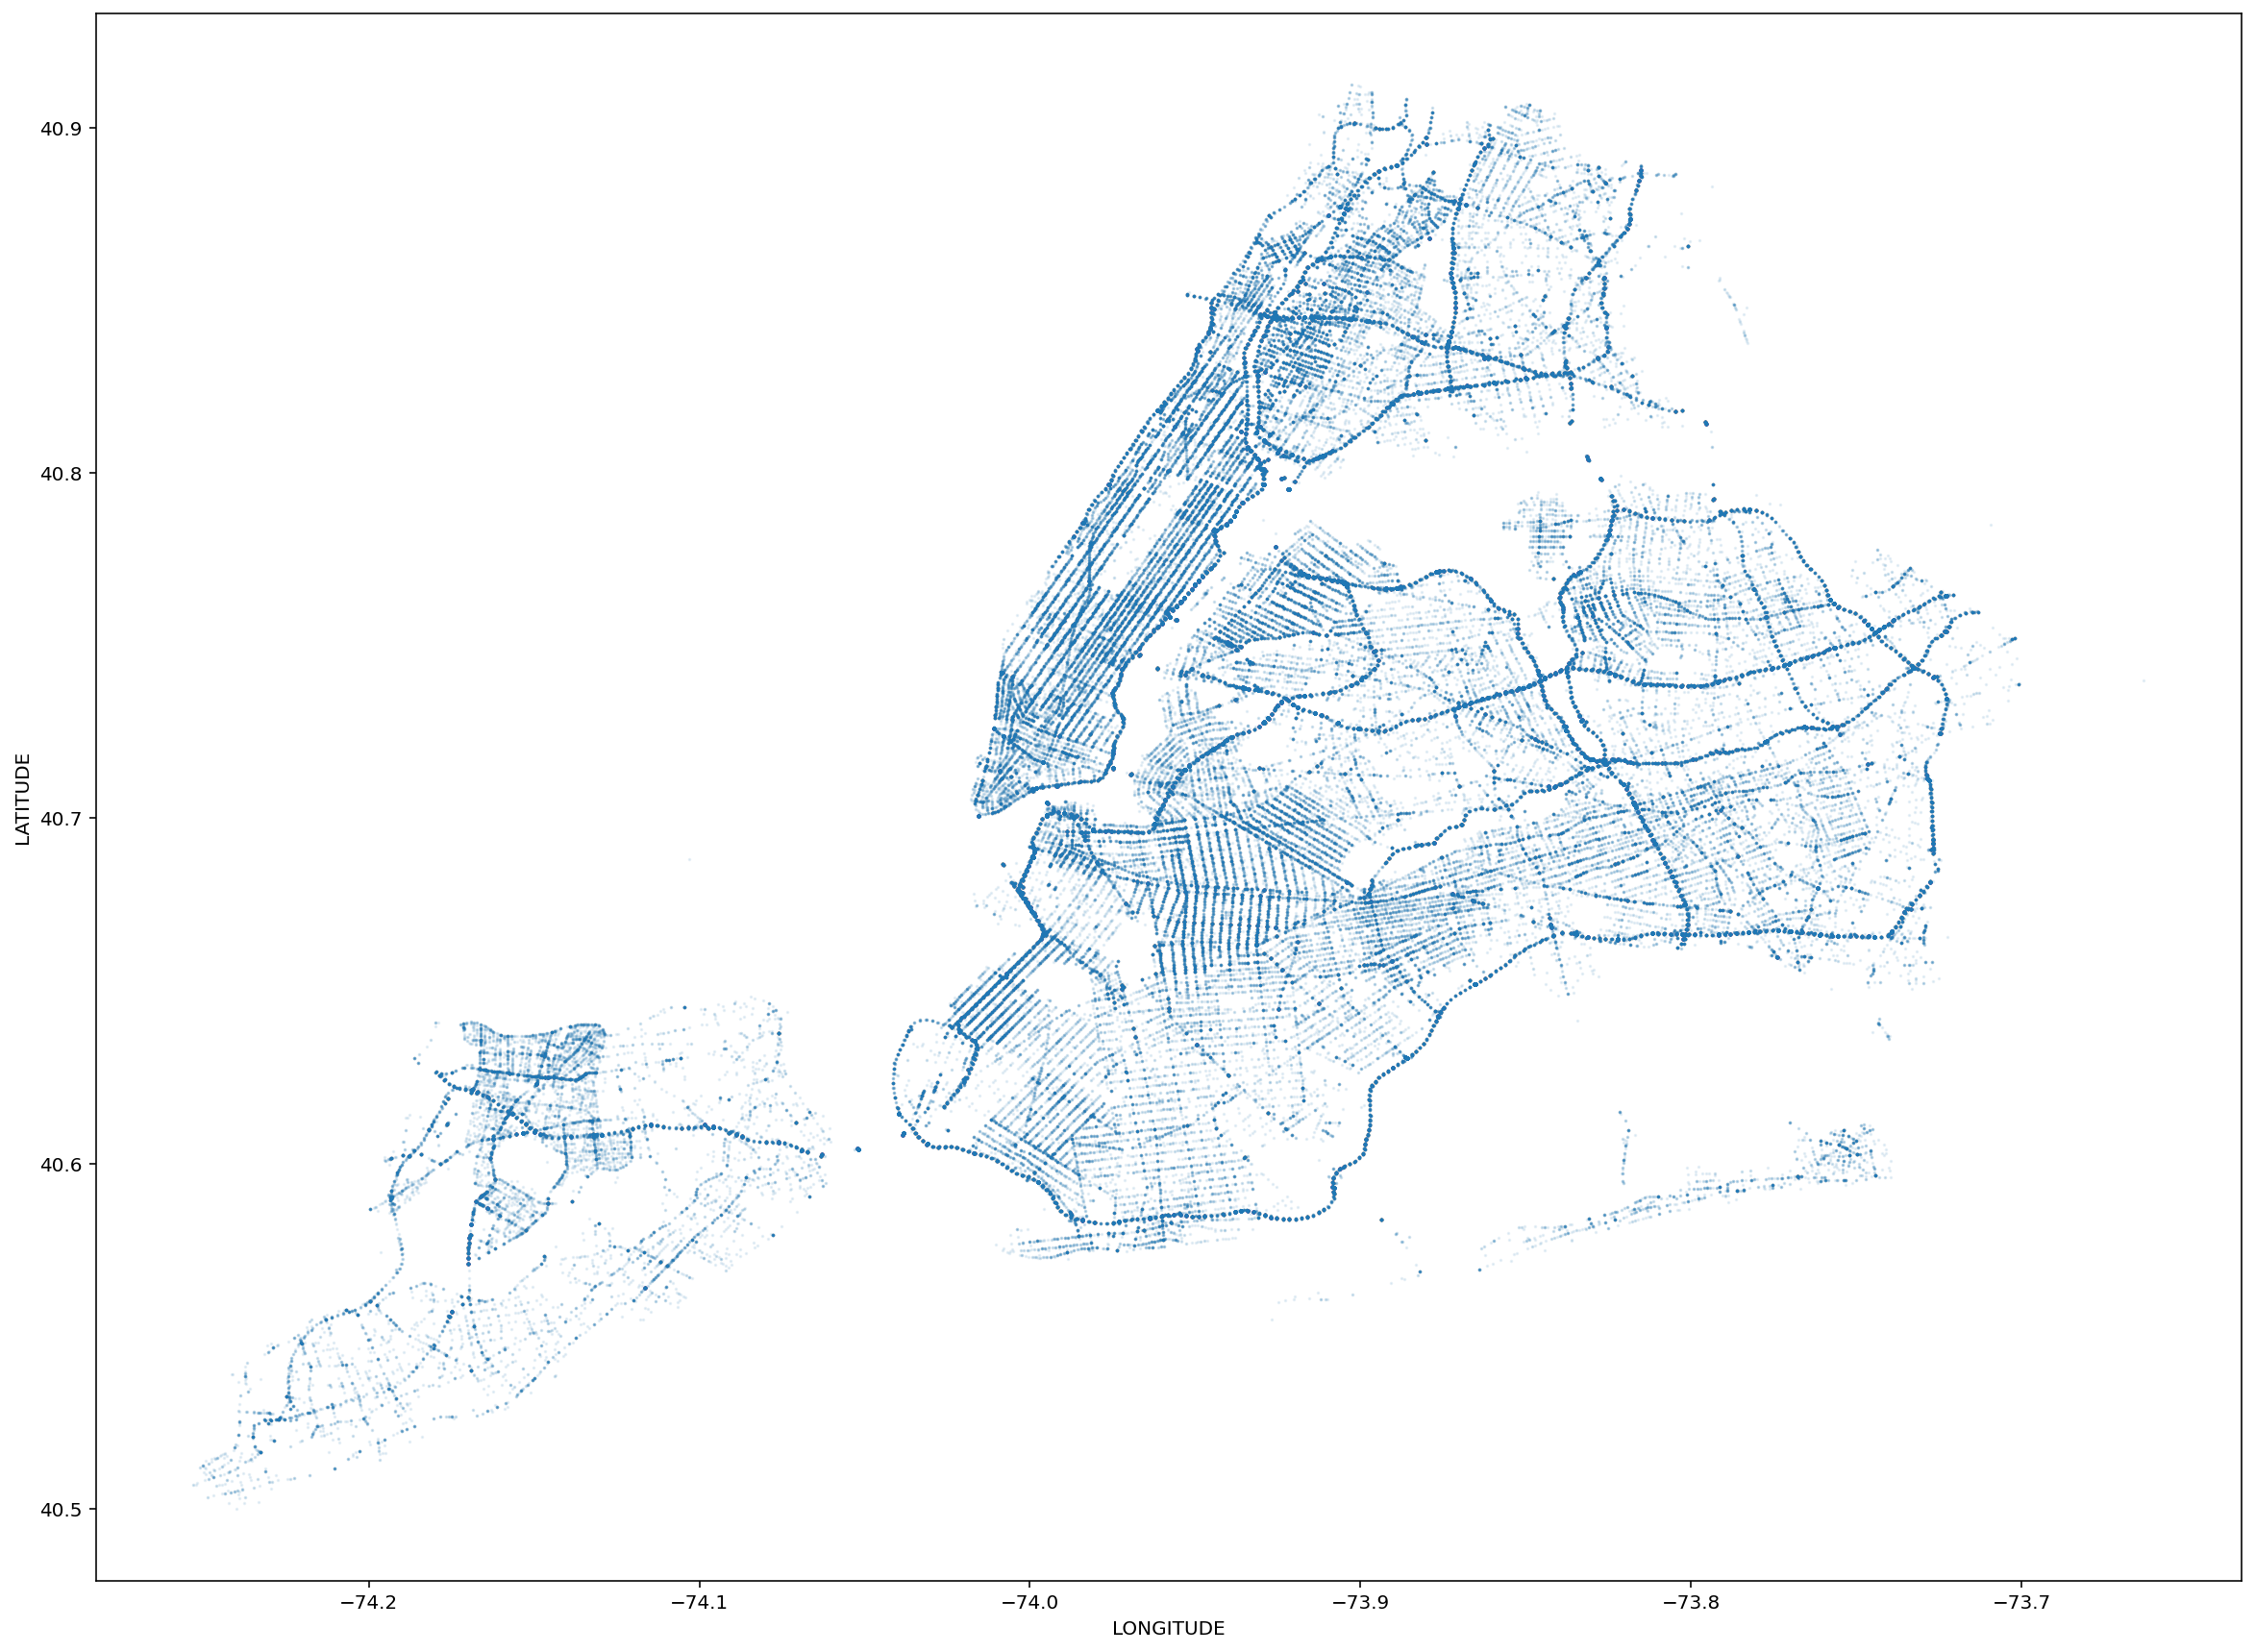

In [57]:
# A map of all the accidents where the BOROUGH is NULL
# We do not detect any obvious spatial patterns of missingness
# at least visually


df[ df.BOROUGH.isnull() & mask ].plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.1)

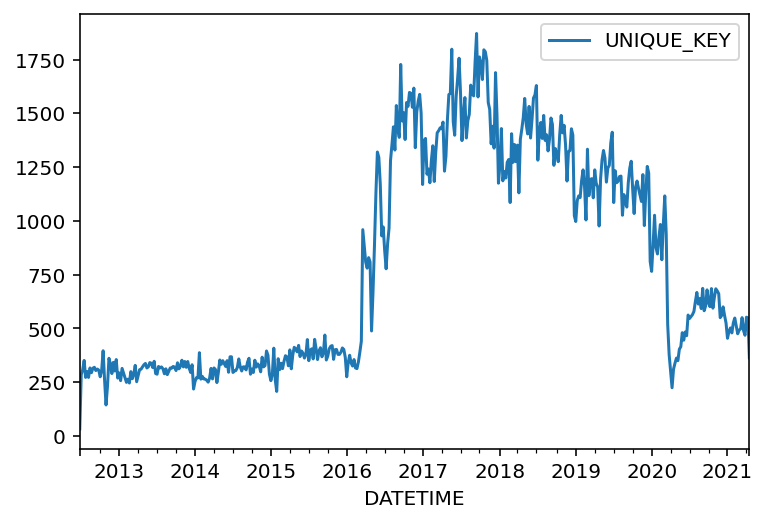

In [58]:
# Check if there is a temporal pattern in the errors

df[ df.BOROUGH.isnull() & mask ].pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

## Augment Borough and Zipcode using Shapefiles

In [59]:
%%time
# We start by converting the LON/LAT attributes into Shapely "geo-points"
# and convert the resut into a geodataframe so that we can do a spatial join 
#from shapely.geometry import Point
#df['Coordinates'] = list(zip(df.LONGITUDE, df.LATITUDE))
#df['Coordinates'] = df['Coordinates'].apply(Point)
#gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

CPU times: user 15.6 s, sys: 276 ms, total: 15.9 s
Wall time: 15.9 s


In [60]:
len(df)

1759525

In [61]:
# We will now perform a spatial join with the NYC shapefile 
# to find the neighborhood for each accident, and also filter out
# automatically all the accidents that have incorrect coordinates
# and/or incorrect BOROUGH listed

In [62]:
shapefile_url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
df_nyc = gpd.GeoDataFrame.from_file(shapefile_url)

In [63]:
df_nyc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
%%time
# Match each accident with a neighborhood. 
# Takes ~ 6-7 mins to run
# This is done with left join, 
# so we preserve all the data points
# but we know which ones are not matching with the shapefile
gdf.crs = df_nyc.crs
gdf = gpd.sjoin(gdf, df_nyc, how='left')


CPU times: user 3min 3s, sys: 1.29 s, total: 3min 5s
Wall time: 3min 5s


In [65]:
len(gdf)

1759525

In [66]:
gdf.columns

Index(['UNIQUE_KEY', 'DATETIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
       'PERSONS_INJURED', 'PERSONS_KILLED', 'PEDESTRIANS_INJURED',
       'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED', 'CYCLISTS_KILLED',
       'MOTORISTS_INJURED', 'MOTORISTS_KILLED', 'geometry', 'index_right',
       'boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng'],
      dtype='object')

In [67]:
# We keep only boro_name and ntaname
todrop = [
    'index_right', 'boro_code', 'county_fip', 'ntacode',
    'shape_area', 'shape_leng'
]

gdf = gdf.drop(todrop, axis='columns')

# Rename the columns
gdf = gdf.rename({
    'boro_name': 'GEO_BOROUGH',
    'ntaname': 'GEO_NEIGHBORHOOD',
},
                 axis='columns')

In [68]:
gdf.columns.values

array(['UNIQUE_KEY', 'DATETIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED',
       'geometry', 'GEO_BOROUGH', 'GEO_NEIGHBORHOOD'], dtype=object)

In [69]:
%%time
shapefile_zip = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
df_zip = gpd.GeoDataFrame.from_file(shapefile_zip)
# Converting the df_zip from {'init': 'epsg:2263'} coordinate system
# to the same lon/lat system used by df_nyc
df_zip = df_zip.to_crs(df_nyc.crs)

# Creating the geodataframe using lon/lat coordinates
# gdf['Coordinates'] = list(zip(gdf.LONGITUDE, gdf.LATITUDE))
# gdf['Coordinates'] = gdf['Coordinates'].apply(Point)
# gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates')

# Spatial inner join, keeping 
gdf.crs = df_zip.crs
gdf = gpd.sjoin(gdf, df_zip, how='left')

todrop = [
    'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS',
    'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN', 'index_right'
]
gdf = gdf.drop(todrop, axis='columns')
gdf = gdf.rename({'ZIPCODE_left': 'ZIPCODE', 'ZIPCODE_right': 'GEO_ZIPCODE'}, axis='columns')

CPU times: user 3min 3s, sys: 747 ms, total: 3min 3s
Wall time: 3min 4s


In [70]:
gdf.columns.values

array(['UNIQUE_KEY', 'DATETIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED',
       'geometry', 'GEO_BOROUGH', 'GEO_NEIGHBORHOOD', 'GEO_ZIPCODE'],
      dtype=object)

In [71]:
len(gdf)

1760459

## Post-Augmentation Analysis of Inconsistencies

In [72]:
len(gdf)

1760459

In [73]:
# Ensure that all collisions are in place
not_matching = set(df['UNIQUE_KEY'].values) - set(gdf['UNIQUE_KEY'].values)
assert( len(not_matching) ==0 )

In [74]:
# Did not match with a shape within the NYC Neighborhoods
len(gdf[ gdf.GEO_BOROUGH.isnull() ])

217975

In [75]:
# Did not match with a shape within the NYC ZIP codes
len(gdf[ gdf.GEO_ZIPCODE.isnull() ])

218774

In [76]:
# Did not match with neither zip nor neighborhood
len(gdf[ gdf.GEO_ZIPCODE.isnull() & gdf.GEO_BOROUGH.isnull() ])

217368

In [77]:
len(gdf[ gdf.GEO_ZIPCODE.isnull() & ~gdf.GEO_BOROUGH.isnull() ])

1406

In [78]:
len(gdf[ ~gdf.GEO_ZIPCODE.isnull() & gdf.GEO_BOROUGH.isnull() ])

607

### Outside general NYC area

These are mainly the entries with no lon/lat, or very incorrect lon/lat

In [79]:
# Defines  LON/LAT entries that are plausibly within NYC
mask = (gdf.LATITUDE > 40) & (gdf.LATITUDE < 41) & (gdf.LONGITUDE < -72) & (gdf.LONGITUDE > -74.5)


In [80]:
# These are the entries that we could filter out with a simple mask
nm1 = gdf[ gdf.GEO_BOROUGH.isnull() & ~mask ]
nm1.head()

UNIQUE_KEY            DATETIME  ... GEO_NEIGHBORHOOD GEO_ZIPCODE
0    4407480 2021-04-14 05:32:00  ...              NaN         NaN
2    4407665 2021-04-15 16:15:00  ...              NaN         NaN
3    4407811 2021-04-13 16:00:00  ...              NaN         NaN
4    4406885 2021-04-12 08:25:00  ...              NaN         NaN
5    4407883 2021-04-13 17:11:00  ...              NaN         NaN

[5 rows x 22 columns]

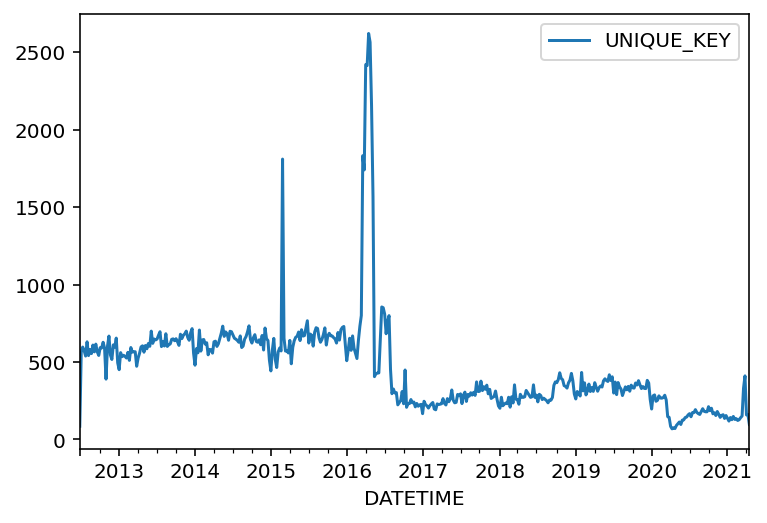

In [81]:
nm1.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [82]:
nm1.LOCATION.value_counts()

(0.0, 0.0)                          209858
(40.75837, -201.23706)                 105
(40.665226000000004, -32.768513)        16
(40.5606, -74.742)                       7
(41.12615, -73.71353)                    5
(40.556175, -47.209625)                  3
(41.061634000000005, -73.97066)          2
(30.78418, -89.13526999999999)           1
(40.854286, -201.35998999999998)         1
(42.107203999999996, -76.02163)          1
(41.258784999999996, -73.99024)          1
(41.34796, -73.96965)                    1
(42.64154, -79.00183)                    1
(34.783634, -86.76847)                   1
(43.344444, -76.2634)                    1
(41.91661, -79.61955)                    1
(41.12421, -73.71412)                    1
(42.318317, -73.755936)                  1
Name: LOCATION, dtype: int64

### No borough detected, within NYC boundaries

In [83]:
# These are the entries that are not matching with a neighborhood
# but are within the NYC boundaries.
nm2 = gdf[gdf.GEO_BOROUGH.isnull() & mask  ]
len(nm2)

7968

In [84]:
nm2.LOCATION.value_counts().head(10)

(40.608757000000004, -74.03808599999999)    669
(40.798256, -73.82744)                      461
(40.604153000000004, -74.05198)             440
(40.704421999999994, -73.99491)             381
(40.604313, -74.05208)                      160
(40.758340000000004, -73.95775)             141
(40.727872999999995, -73.9291223)           138
(40.714527000000004, -73.97480999999999)    138
(40.608364, -74.038666)                     131
(40.704388, -73.994576)                     128
Name: LOCATION, dtype: int64

In [85]:
nm2['ON_STREET_NAME'].value_counts().head(10)

VERRAZANO BRIDGE UPPER              858
BRONX WHITESTONE BRIDGE             773
BROOKLYN BRIDGE                     603
VERRAZANO BRIDGE LOWER              355
THROGS NECK BRIDGE                  344
WILLIAMSBURG BRIDGE OUTER ROADWA    315
QUEENS MIDTOWN TUNNEL               309
BROOKLYN BATTERY TUNNEL             306
CROSS BRONX EXPY                    295
FDR DRIVE                           259
Name: ON_STREET_NAME, dtype: int64

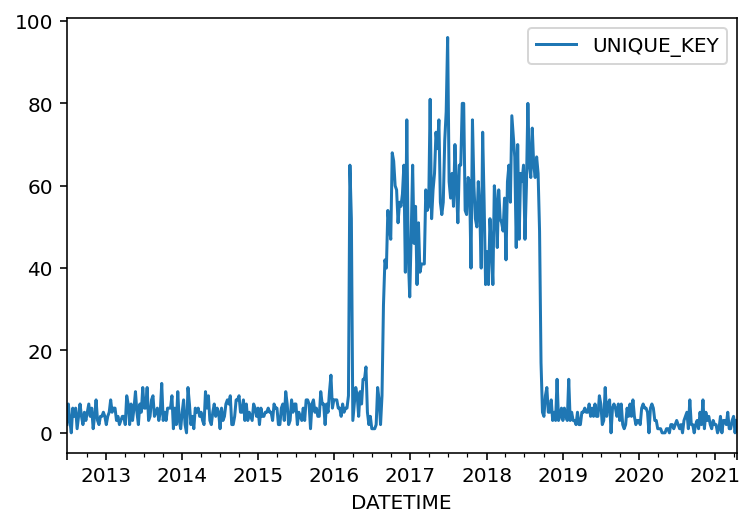

In [86]:
nm2.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

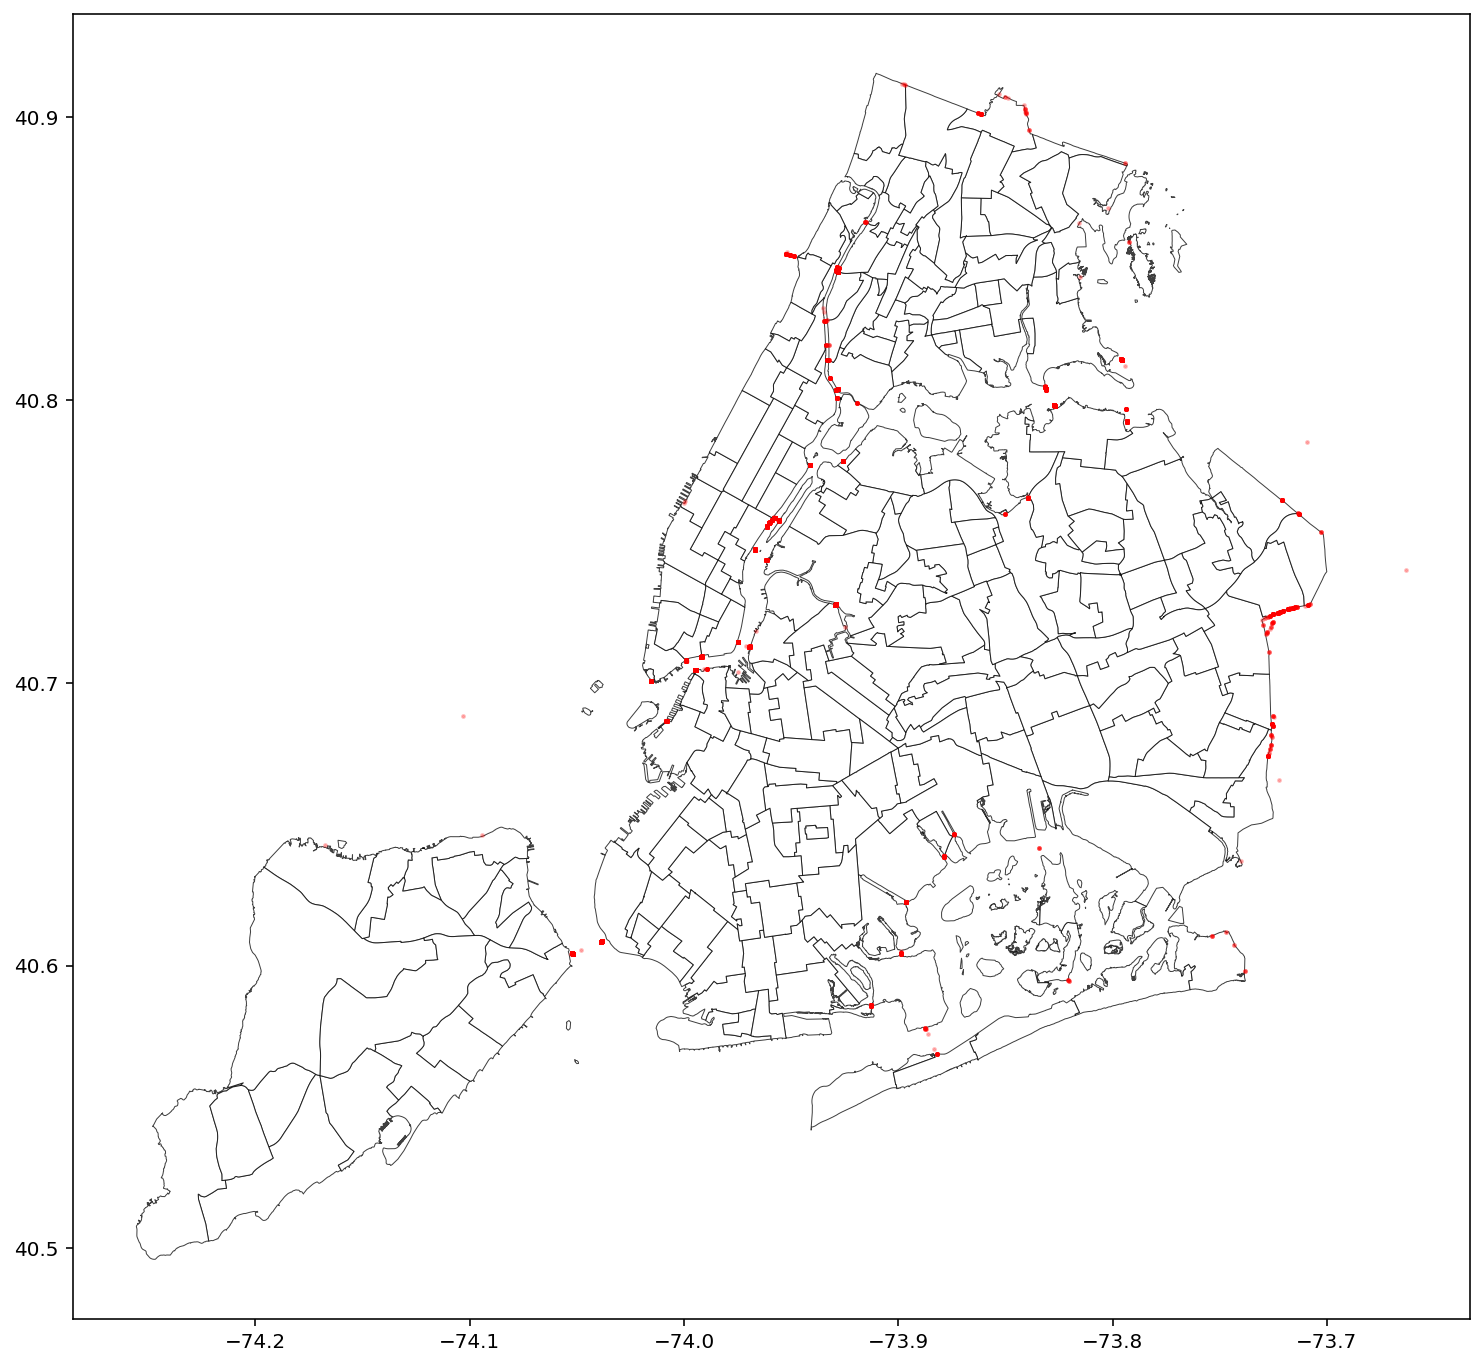

In [87]:
# The plot reveals that these are all bridge accidents
#
# Perhaps we may want to keep them in later versions
#
base = df_nyc.plot(linewidth=0.5,
                   color='White',
                   edgecolor='Black',
                   figsize=(15, 12),
                   alpha=0.75)

nm2.plot(figsize=(15, 12), c='red', markersize=2, alpha=0.25, ax=base)

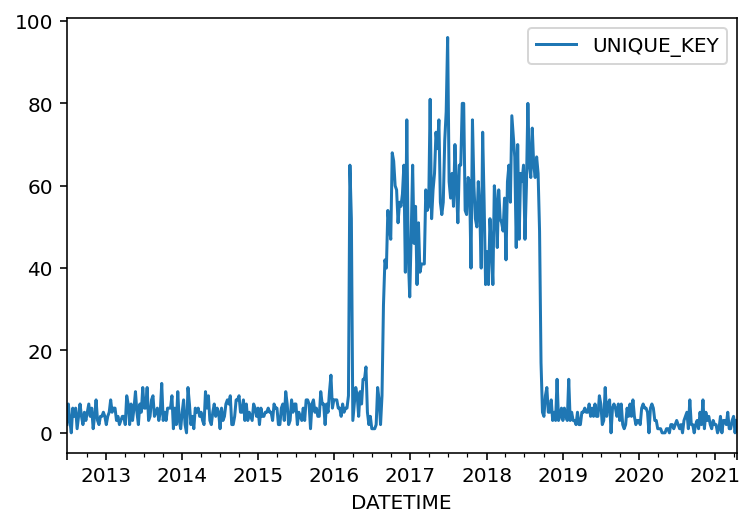

In [88]:
nm2.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

### No ZIP detected, within NYC boundaries

In [89]:
# These are the entries that are not matching with a neighborhood
# but are within the NYC boundaries.
nm3 = gdf[gdf.GEO_ZIPCODE.isnull() & mask  ]
len(nm3)

8767

In [90]:
nm3['ON_STREET_NAME'].value_counts().head(20)

VERRAZANO BRIDGE UPPER              858
BRONX WHITESTONE BRIDGE             773
BROOKLYN BRIDGE                     603
VERRAZANO BRIDGE LOWER              355
THROGS NECK BRIDGE                  344
WILLIAMSBURG BRIDGE OUTER ROADWA    315
QUEENS MIDTOWN TUNNEL               309
BROOKLYN BATTERY TUNNEL             306
CROSS BRONX EXPY                    295
ROCKAWAY BOULEVARD                  291
FDR DRIVE                           259
METROPOLITAN AVENUE                 227
TRIBOROUGH BRIDGE                   222
BROOKLYN QUEENS EXPRESSWAY          193
WILLIAMSBURG BRIDGE INNER ROADWA    190
QUEENSBORO BRIDGE LOWER ROADWAY     186
MANHATTAN BR UPPER                  175
WILLIS AVE BRIDGE                   169
VERRAZANO BRIDGE                    158
QUEENSBORO BRIDGE LOWER             144
Name: ON_STREET_NAME, dtype: int64

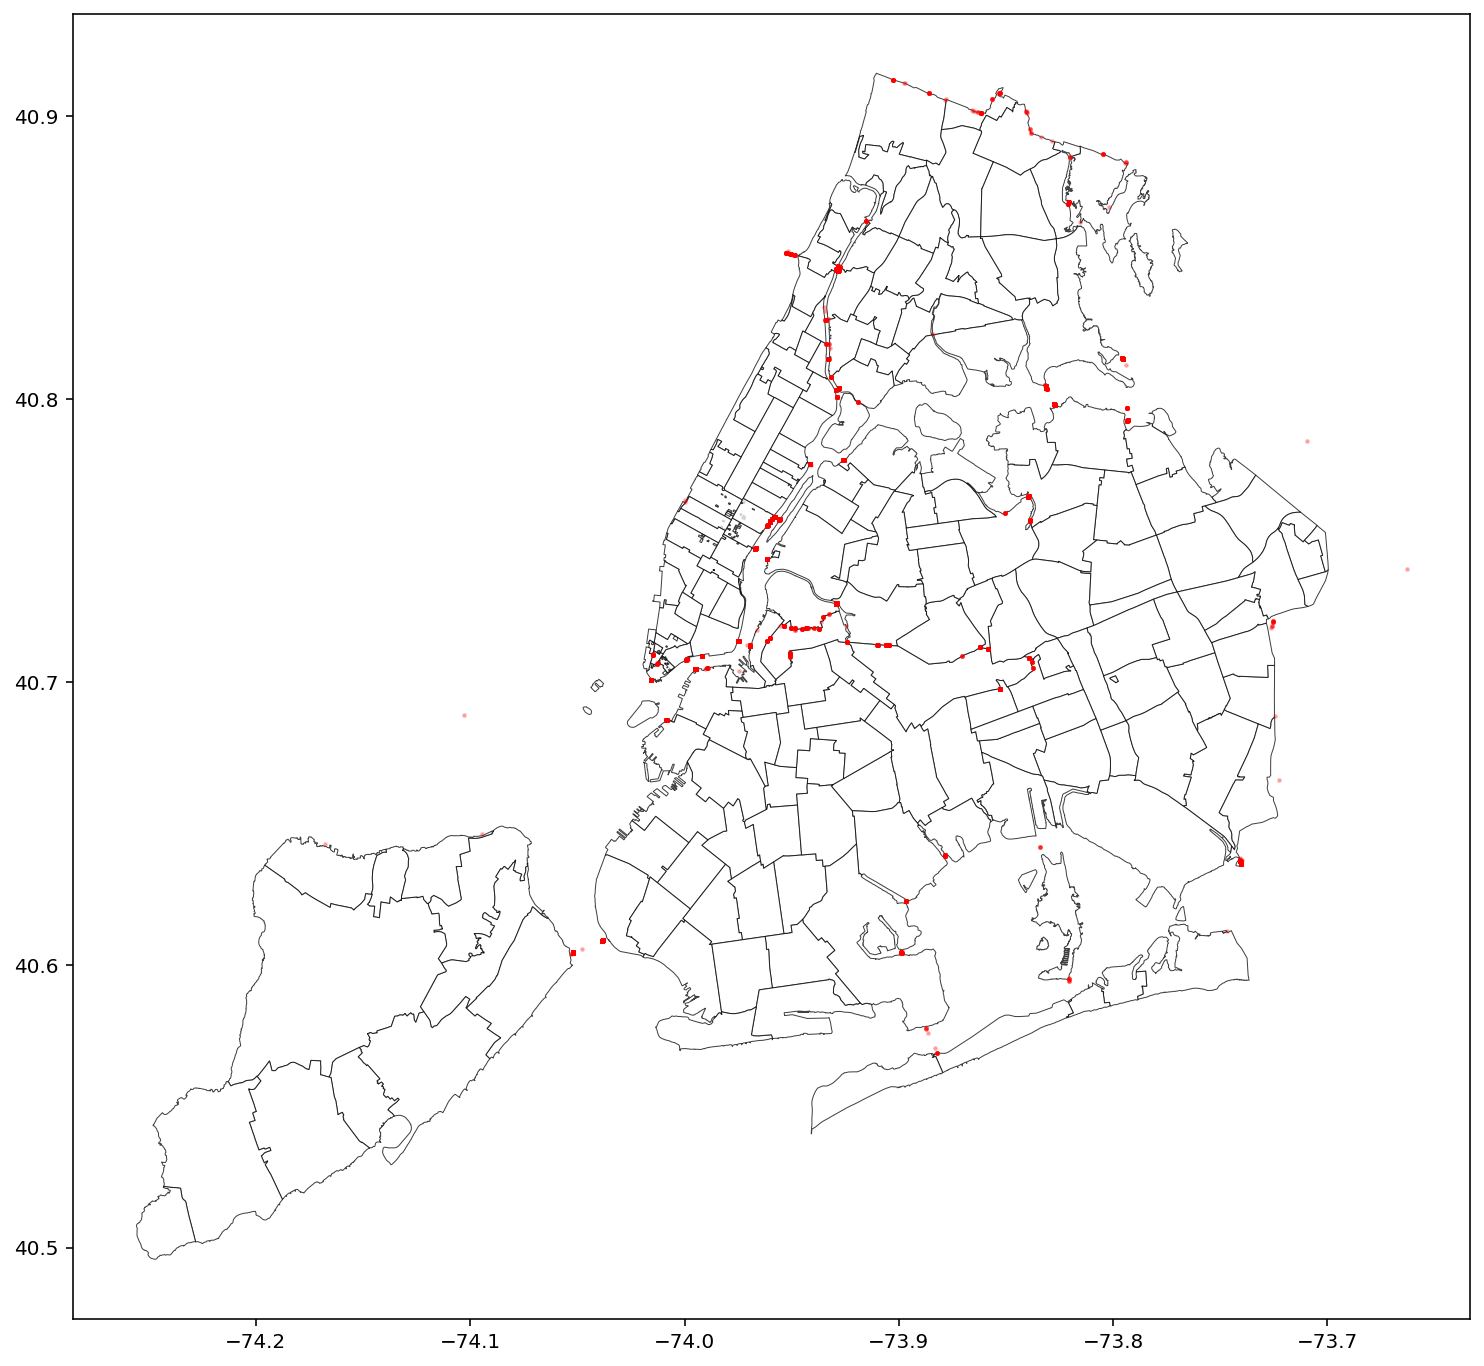

In [91]:
# The plot reveals that these are all bridge accidents
#
# Perhaps we may want to keep them in later versions
#
base = df_zip.plot(linewidth=0.5,
                   color='White',
                   edgecolor='Black',
                   figsize=(15, 12),
                   alpha=0.75)

nm3.plot(figsize=(15, 12), c='red', markersize=2, alpha=0.25, ax=base)

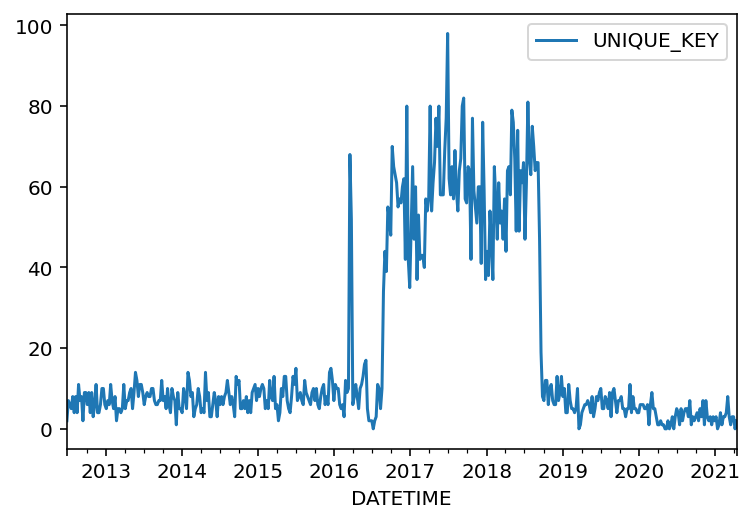

In [92]:
nm3.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

### Discrepancy between detected and reported borough

In [93]:
# Code below lists cases where the borough is incorrectly coded based on lon/lat
# TODO: Perhaps also check cases where zipcode is incorrectly coded
errors_boro = gdf[mask & ~gdf.BOROUGH.isnull() & ~gdf.GEO_BOROUGH.isnull() &
                  (gdf.GEO_BOROUGH.str.lower() != gdf.BOROUGH.str.lower())]
errors_boro = pd.DataFrame(errors_boro)

In [94]:
len(errors_boro)

1929

In [95]:
errors_boro.LOCATION.value_counts().head(10)

(40.7136, -74.0091)                  92
(40.8756831, -73.9083783)            58
(40.873642, -73.90796999999999)      57
(40.7244, -73.9818)                  50
(40.7339, -73.9542)                  43
(40.699937799999994, -73.9118079)    38
(40.8772207, -73.90904509999999)     32
(40.875640000000004, -73.90836)      32
(40.699531, -73.91103670000001)      28
(40.68319, -73.8663)                 18
Name: LOCATION, dtype: int64

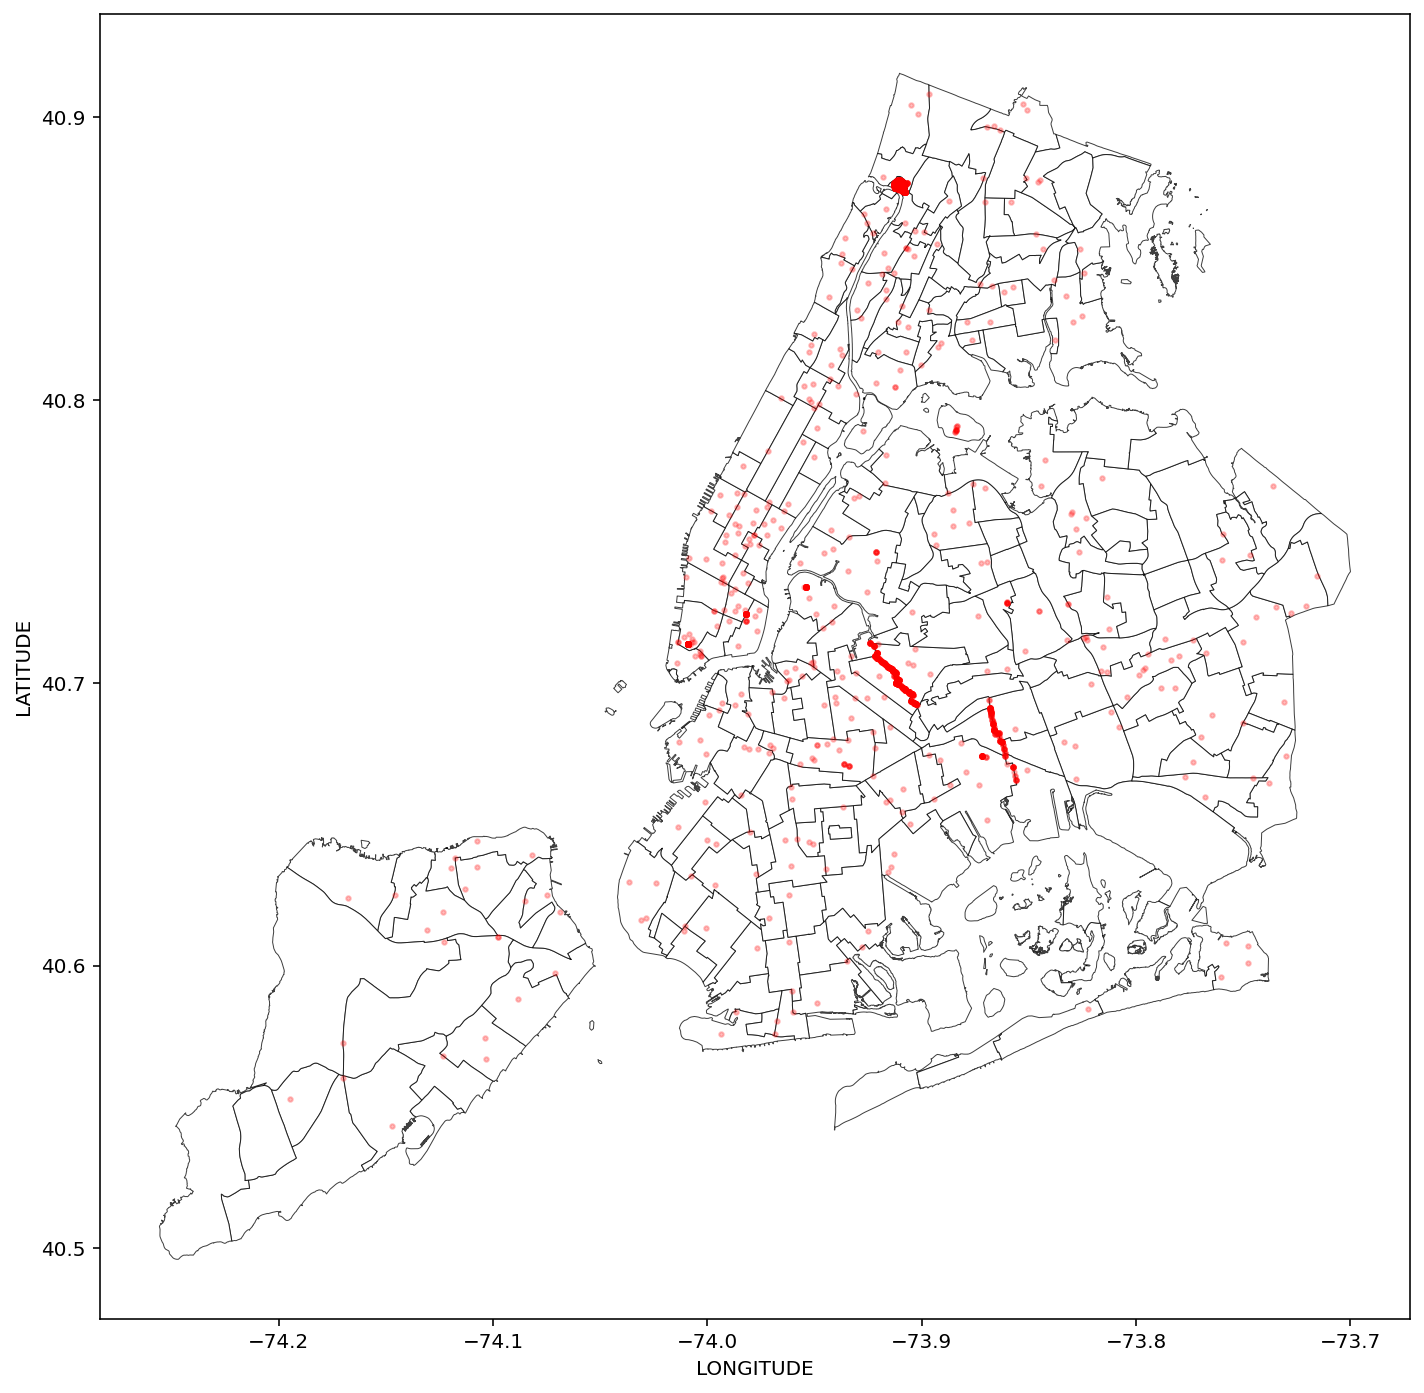

In [96]:
# The plot reveals that most are border issues
# but there are random errors spread throughout the city
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_boro.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

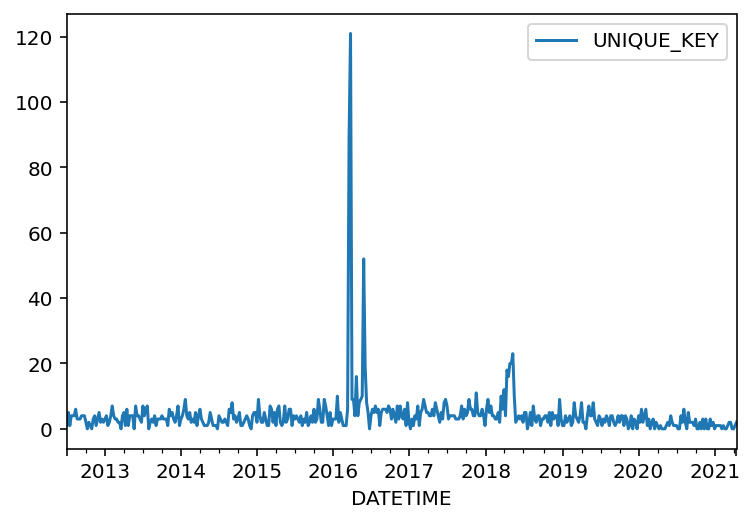

In [97]:
errors_boro.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [98]:
# Check cases where there was a reported borough code but not a detected one
errors_boro2 = gdf [mask & ~gdf.BOROUGH.isnull() & gdf.GEO_BOROUGH.isnull()]
errors_boro2 = pd.DataFrame(errors_boro2)
len(errors_boro2)

501

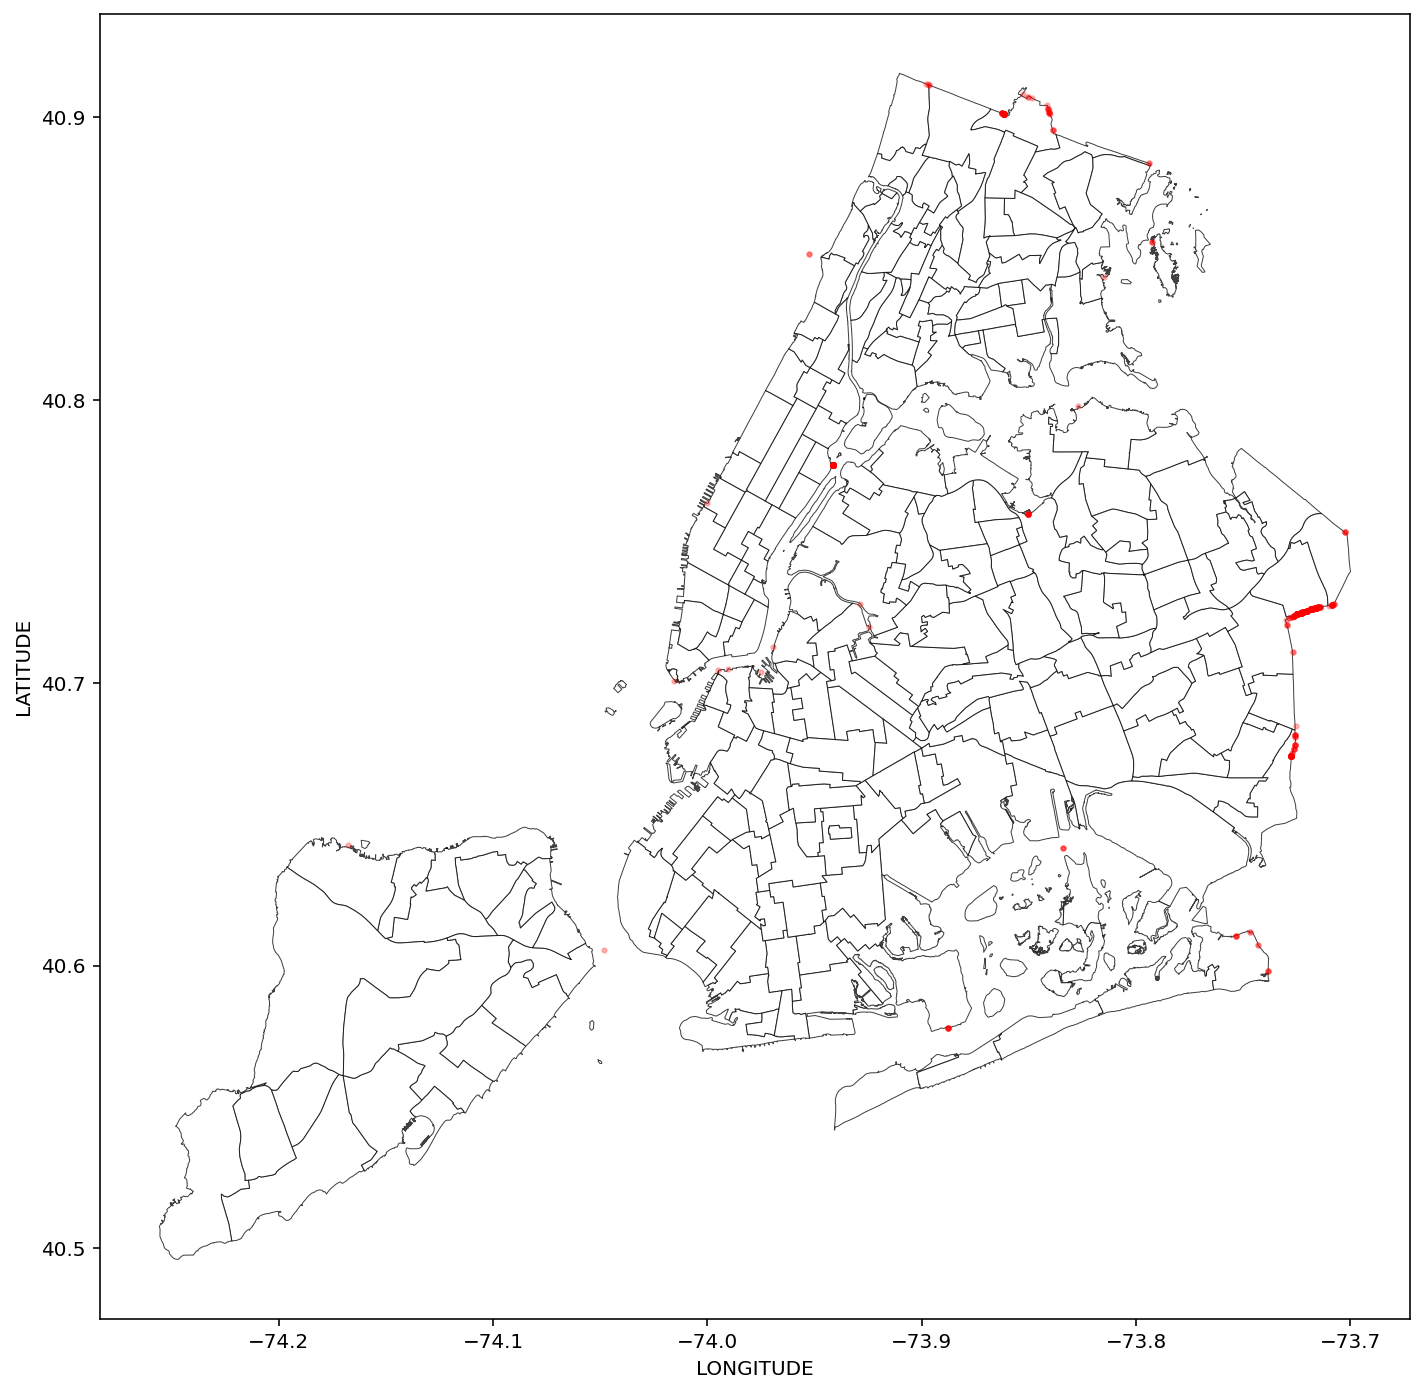

In [99]:
# The plot reveals that most are border issues
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_boro2.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

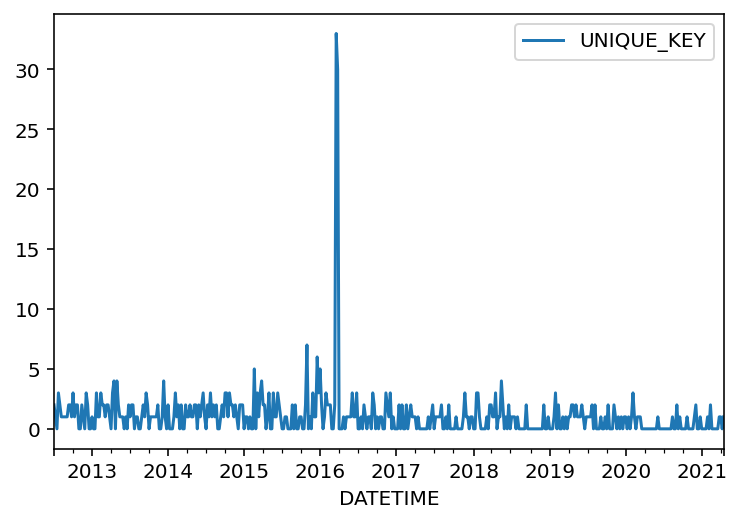

In [100]:
errors_boro2.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

### Discrepancy between detected and reported zip

In [101]:
# Code below lists cases where the borough is incorrectly coded based on lon/lat
errors_zip = gdf [ mask & ~gdf.ZIPCODE.isnull() & ~gdf.GEO_ZIPCODE.isnull() & (gdf.GEO_ZIPCODE != gdf.ZIPCODE) ]
errors_zip = pd.DataFrame(errors_zip)
len(errors_zip)

98822

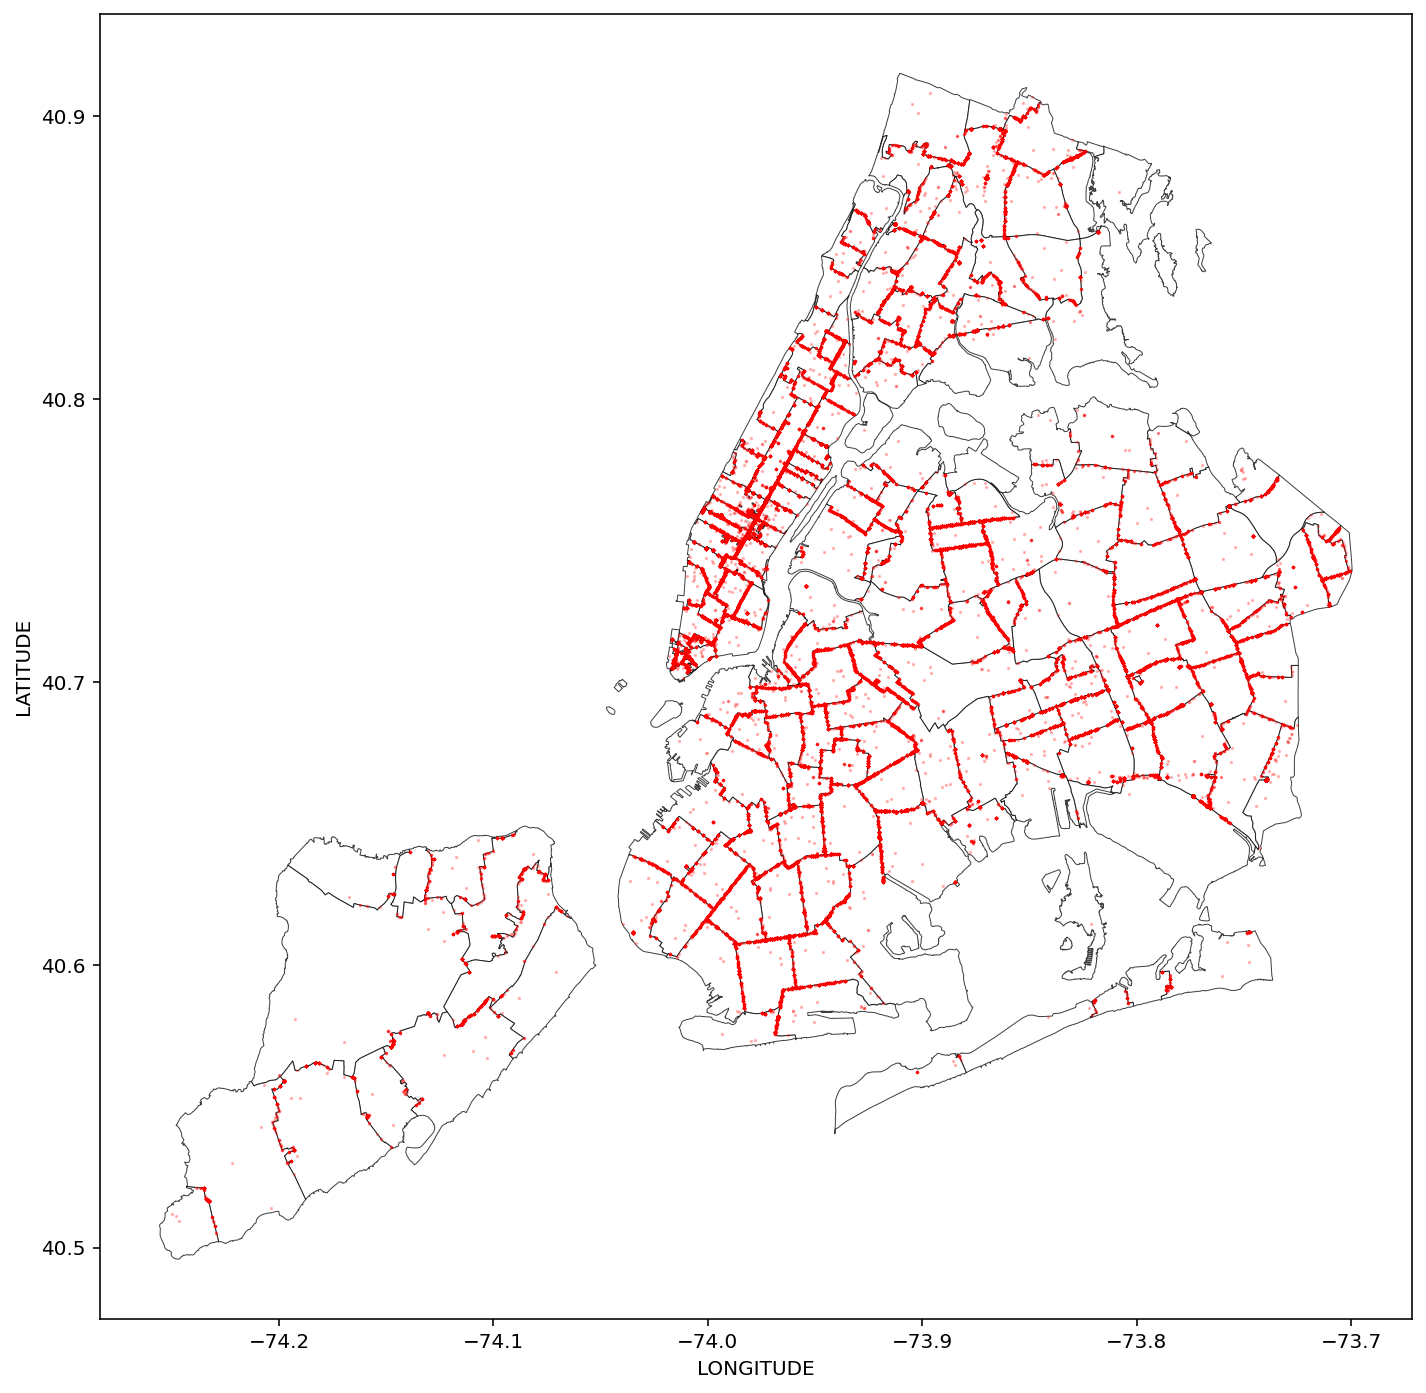

In [102]:
# The plot reveals that most are border issues
# but there are random errors spread throughout the city
base = df_zip.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_zip.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=0.5,
    alpha=0.25, ax=base)

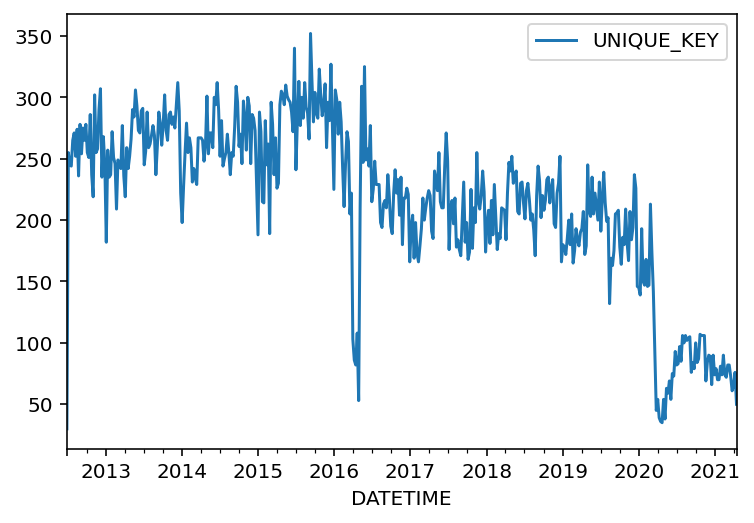

In [103]:
errors_zip.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [104]:
# Check cases where there was a reported ZIP code but not a detected one
errors_zip2 = gdf [ mask & ~gdf.ZIPCODE.isnull() & gdf.GEO_ZIPCODE.isnull() ]
errors_zip2 = pd.DataFrame(errors_zip2)
len(errors_zip2)

1277

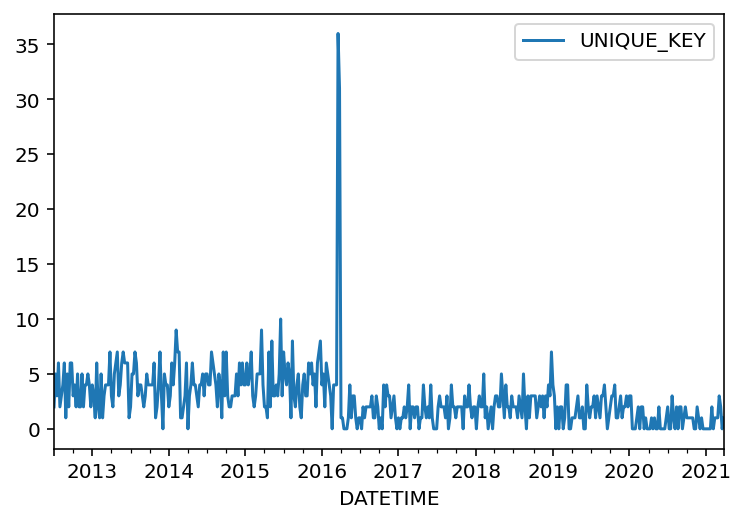

In [105]:
errors_zip2.pivot_table(
    index='DATETIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

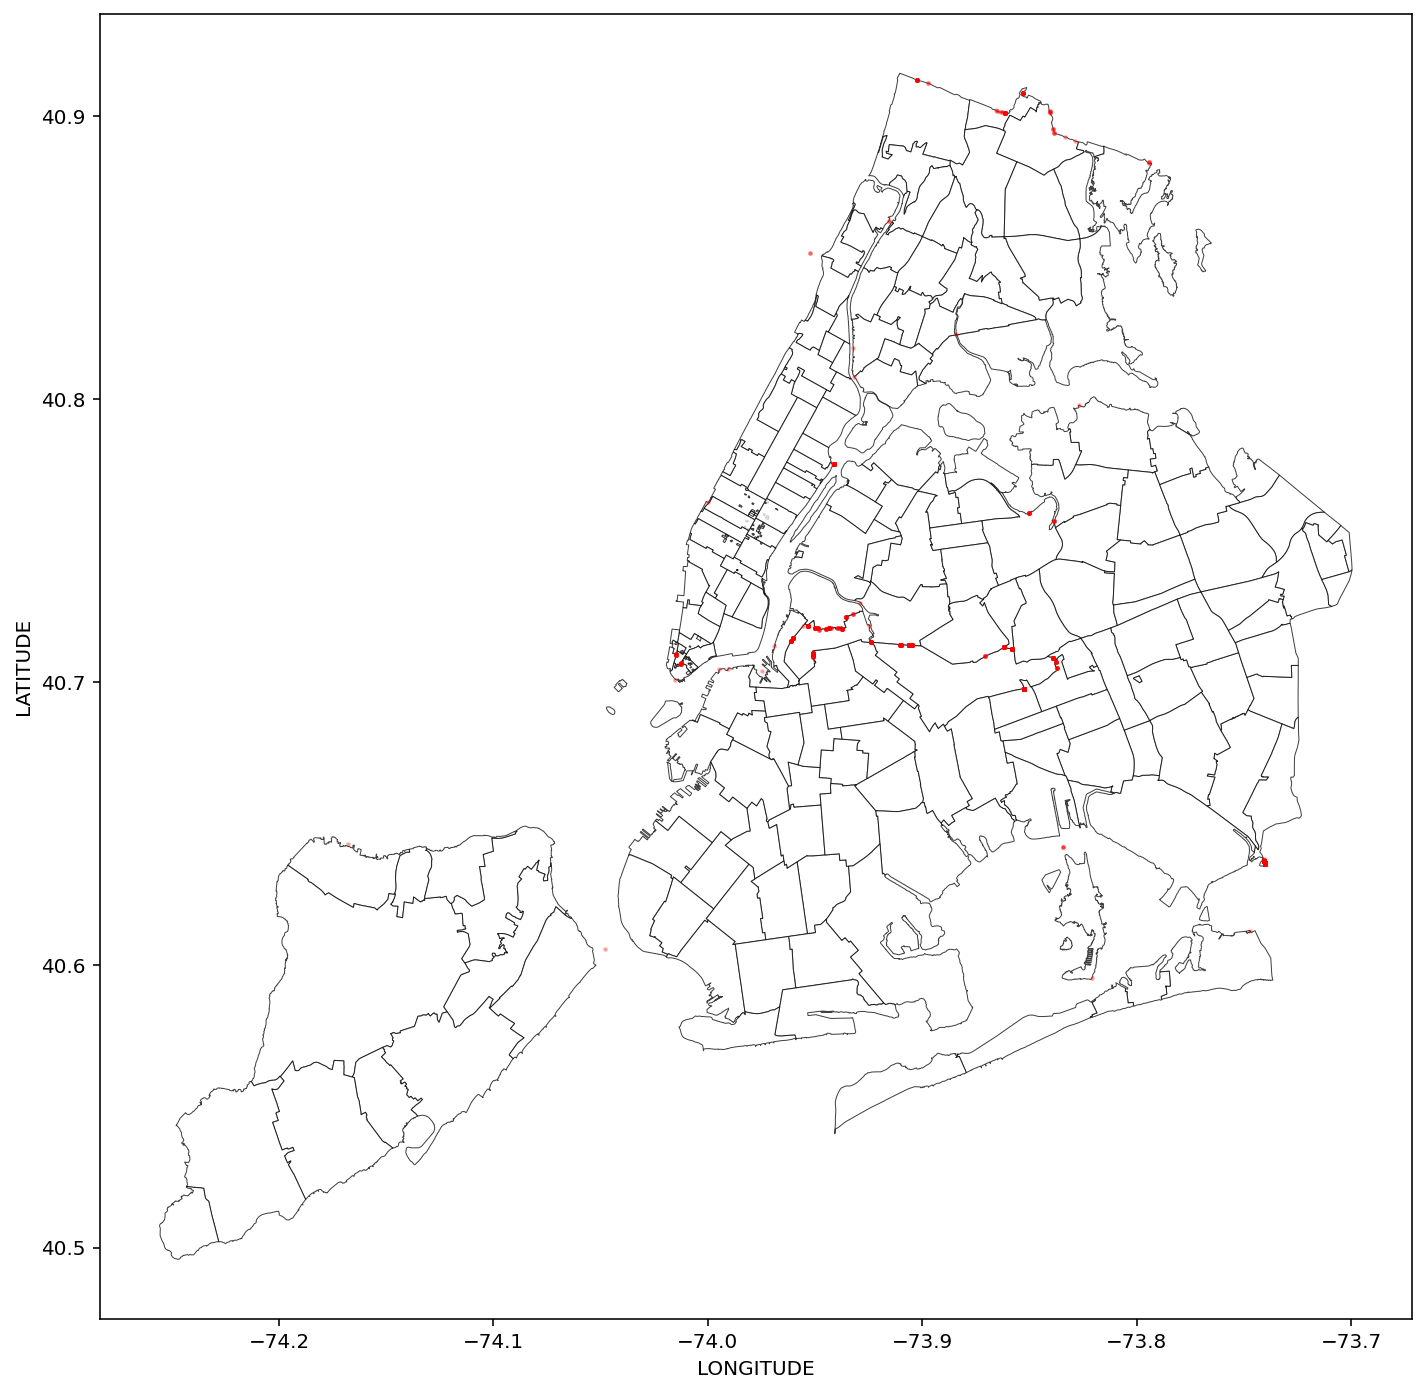

In [106]:
# The plot reveals that most are border issues
base = df_zip.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_zip2.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=2,
    alpha=0.25, ax=base)

## Prepare Final DataSet

In [107]:
gdf.columns.values

array(['UNIQUE_KEY', 'DATETIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED',
       'geometry', 'GEO_BOROUGH', 'GEO_NEIGHBORHOOD', 'GEO_ZIPCODE'],
      dtype=object)

In [108]:
# Defines LON/LAT entries that are plausibly within NYC
# We will use the mask to set to NULL all other lat/lon values
# The analysis above indicates that the lon/lat that are within the mask
# but "do not match" are actually, fine and most are border cases
mask = (gdf.LATITUDE > 40) & (gdf.LATITUDE < 41) & (gdf.LONGITUDE < -72) & (gdf.LONGITUDE > -74.5)

gdf.loc[~mask, 'LATITUDE'] = None
gdf.loc[~mask, 'LONGITUDE'] = None

In [109]:
# Keeping the ZIP and BOROUGH from the original dataset 
# but changing its names, to distinguish from the detected
# ones from the shapefiles

gdf = gdf.rename(
    {
        'ZIPCODE': 'REPORTED_ZIPCODE',
        'BOROUGH': 'REPORTED_BOROUGH',
    },
    axis='columns')

gdf = gdf.rename(
    {
        'GEO_ZIPCODE': 'ZIPCODE',
        'GEO_BOROUGH': 'BOROUGH',
        'GEO_NEIGHBORHOOD': 'NEIGHBORHOOD'
    },
    axis='columns')

In [110]:
# Reorder the columns, dropping columns we do not need

columns = [
    'UNIQUE_KEY', 'DATETIME', 'LATITUDE', 'LONGITUDE', 
    'ZIPCODE', 'NEIGHBORHOOD', 'BOROUGH', 
    'PERSONS_INJURED', 'PERSONS_KILLED', 
    'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 
    'CYCLISTS_INJURED', 'CYCLISTS_KILLED',
    'MOTORISTS_INJURED', 'MOTORISTS_KILLED', 
    'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
    'REPORTED_ZIPCODE', 'REPORTED_BOROUGH'
]

gdf = gdf[columns]

In [111]:
# Sort by date
gdf = gdf.sort_values('DATETIME')

In [112]:
final_df = pd.DataFrame(gdf)

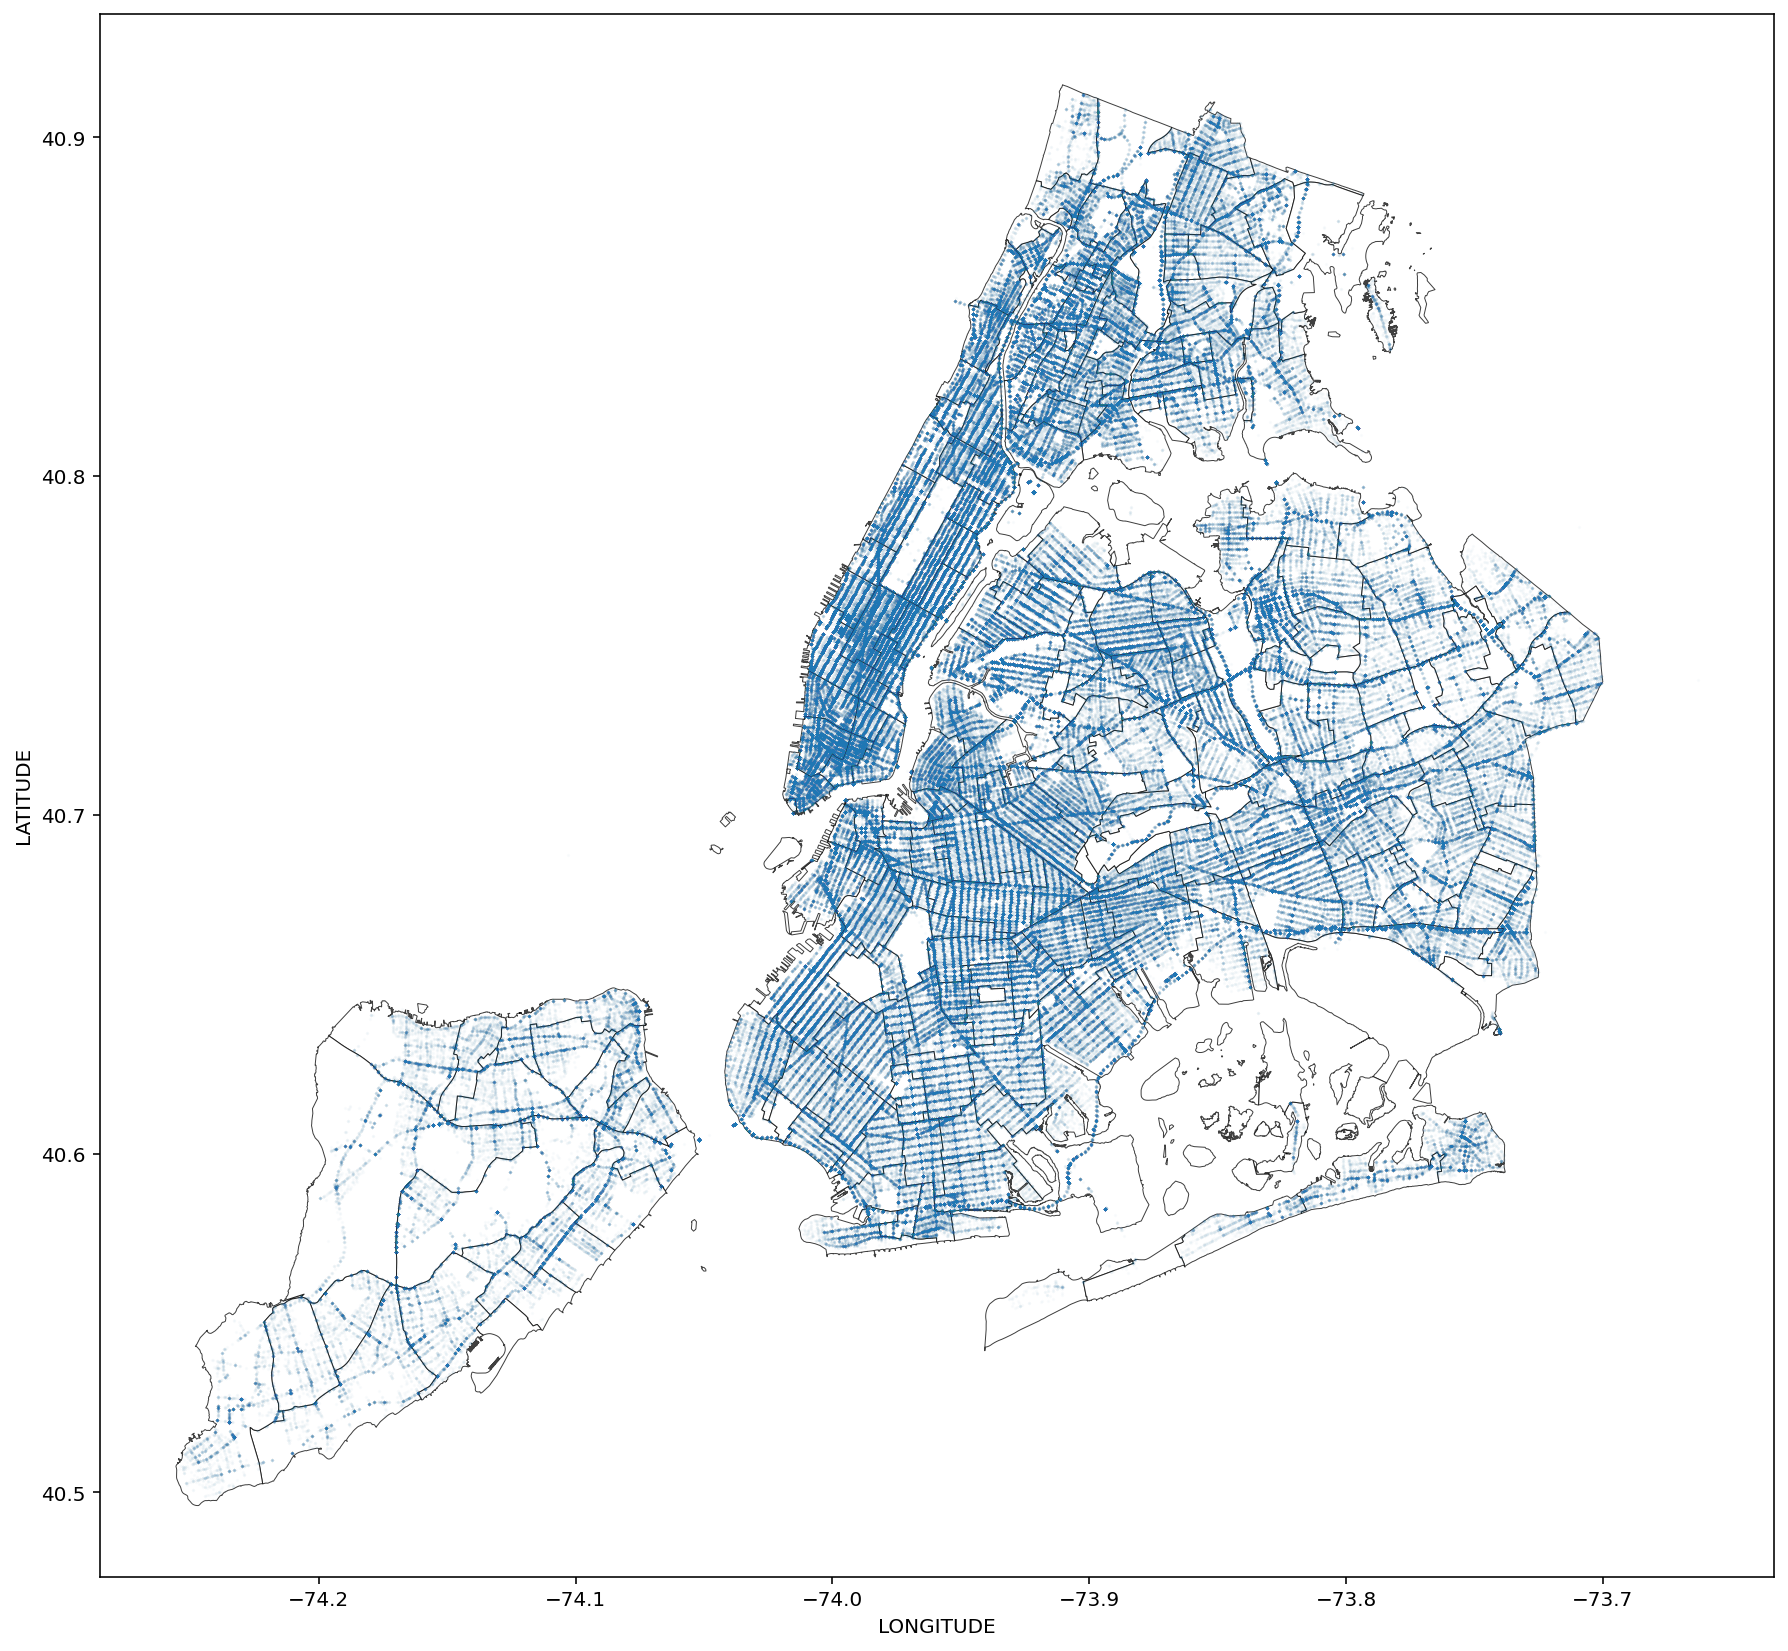

In [113]:
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

scatterplot = final_df.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    s=0.5,
    alpha=0.02,
    ax=base)

In [114]:
final_df.to_csv('collisions.csv.gz', index=False, compression='gzip')

In [115]:
# 4050018: Panos :-)
final_df.query('UNIQUE_KEY  == "4050018"').T

363518
UNIQUE_KEY                                              4050018
DATETIME                                    2018-12-21 20:10:00
LATITUDE                                                40.7428
LONGITUDE                                              -74.0077
ZIPCODE                                                   10011
NEIGHBORHOOD         Hudson Yards-Chelsea-Flatiron-Union Square
BOROUGH                                               Manhattan
PERSONS_INJURED                                               0
PERSONS_KILLED                                                0
PEDESTRIANS_INJURED                                           0
PEDESTRIANS_KILLED                                            0
CYCLISTS_INJURED                                              0
CYCLISTS_KILLED                                               0
MOTORISTS_INJURED                                             0
MOTORISTS_KILLED                                              0
ON_STREET_NAME                 10 AVENUE                       
CROSS_STREET_NAME                                WEST 15 STREET
OFF_STREET_NAME                                             NaN
REPORTED_ZIPCODE                                          10011
REPORTED_BOROUGH                                      MANHATTAN

## Contributing factor and Vehicle type

* Examine the contents of Contributing factor and Vehicle type. Replace noisy values with UNSPECIFIED

* Add a column "NUM_VEHICLES" to show the number of vehicles involved in the accident. Check that we do not have NaNs before a real value in CAUSE and in VEHICLE TYPE, and that the two columns (CAUSE AND VEHICLE) agree in the number.

In [116]:
ct_df

CAUSE       VEHICLE_TYPE  VEHICLE
UNIQUE_KEY                                         
100         UNSPECIFIED  PASSENGER VEHICLE        1
100         UNSPECIFIED  PASSENGER VEHICLE        2
1000        UNSPECIFIED  PASSENGER VEHICLE        1
1000        UNSPECIFIED            UNKNOWN        2
10000       UNSPECIFIED               TAXI        1
...                 ...                ...      ...
999997      UNSPECIFIED  PASSENGER VEHICLE        2
999998      UNSPECIFIED  PASSENGER VEHICLE        1
999998      UNSPECIFIED  PASSENGER VEHICLE        2
999999      UNSPECIFIED  PASSENGER VEHICLE        1
999999      UNSPECIFIED  PASSENGER VEHICLE        2

[3358470 rows x 3 columns]

In [117]:
len(set(ct_df.index) - set(final_df.UNIQUE_KEY.values))

339

In [118]:
ct_df.CAUSE.value_counts()

UNSPECIFIED                                              1981952
DRIVER INATTENTION/DISTRACTION                            420762
FAILURE TO YIELD RIGHT-OF-WAY                             116159
FOLLOWING TOO CLOSELY                                     108121
OTHER VEHICULAR                                            86784
BACKING UNSAFELY                                           74385
FATIGUED/DROWSY                                            58912
PASSING OR LANE USAGE IMPROPER                             54423
TURNING IMPROPERLY                                         52199
PASSING TOO CLOSELY                                        47599
UNSAFE LANE CHANGING                                       40241
TRAFFIC CONTROL DISREGARDED                                33891
DRIVER INEXPERIENCE                                        32310
LOST CONSCIOUSNESS                                         25141
PAVEMENT SLIPPERY                                          21819
UNSAFE SPEED             

In [119]:
# We replace noisy causes with UNSPECIFIED and not with NaN, as NaN is used to mean "no vehicle"
import numpy as np
ct_df.CAUSE = ct_df.CAUSE.replace(to_replace='1', value='UNSPECIFIED')
ct_df.CAUSE = ct_df.CAUSE.replace(to_replace='80', value='UNSPECIFIED')
ct_df.CAUSE = ct_df.CAUSE.replace(to_replace='ILLNES', value='ILLNESS')

In [120]:
ct_df.VEHICLE_TYPE.value_counts()

SEDAN                                  792709
PASSENGER VEHICLE                      762459
STATION WAGON/SPORT UTILITY VEHICLE    643286
SPORT UTILITY / STATION WAGON          333564
TAXI                                   139583
                                        ...  
MCY B                                       1
BOBCT                                       1
MOVIE                                       1
SEMITRAILE                                  1
VMS SIGN                                    1
Name: VEHICLE_TYPE, Length: 1348, dtype: int64

In [121]:
# Also consult https://data.ny.gov/api/assets/83055271-29A6-4ED4-9374-E159F30DB5AE

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='STATION WAGON/SPORT UTILITY VEHICLE', value='SPORT UTILITY / STATION WAGON')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SUBN', value='SPORT UTILITY / STATION WAGON')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SUBN/', value='SPORT UTILITY / STATION WAGON')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='WAGON', value='SPORT UTILITY / STATION WAGON')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BU', value='BUS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BS', value='BUS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SCHOOL BUS', value='BUS')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='P/SH', value='POWER SHOVEL')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MULTI-WHEELED VEHICLE', value='LARGE COM VEH(6 OR MORE TIRES)')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SMALL', value='SMALL COM VEH(4 TIRES)')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SMALL COM VEH(4 TIRES) ', value='SMALL COM VEH(4 TIRES)')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIVER', value='LIVERY VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIMOU', value='LIVERY VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIMO', value='LIVERY VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIMO/', value='LIVERY VEHICLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FORKL', value='FORK LIFT')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FORK', value='FORK LIFT')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DUMP', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DUMPS', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DUMPT', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PUMP', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DP', value='DUMP TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='GARBA', value='GARBAGE OR REFUSE')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='CONV', value='CONVERTIBLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='CONVE', value='CONVERTIBLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SP', value='SNOW PLOW')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='2 DR SEDAN', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='4 DR SEDAN', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SUDAN', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SE', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='4DS', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='4DSD', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='3-DOOR', value='SEDAN')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN CAMPER', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN T', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN F', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN A', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN W', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN/B', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAB', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VANG', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN C', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN/T', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VANETTE', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN`', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAV', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VN', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN (', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ENCLOSED BODY - REMOVABLE ENCLOSURE', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ENCLOSED BODY - NONREMOVABLE ENCLOSURE', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ENCLO', value='VAN')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTOR HOME', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTORIZED HOME', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='RV', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='R/V C', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='RV/TR', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='H/WH', value='R/V') # house on wheels


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AM', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMB', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMBU', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMBUL', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ANBUL', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMABU', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMULA', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ABULA', value='AMBULANCE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BICYC', value='BICYCLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BIKE', value='BICYCLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TANK', value='TANK TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TANKE', value='TANK TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TANKER', value='TANK TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='OTHER', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNK', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNK,', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKN', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKNO', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKNOWN', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKOW', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNNKO', value='UNKNOWN')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SC', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SCOO', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SCOOT', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTER', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPD', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPAD', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPET', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPEN', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='E BIK', value='E-BIKE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='E-BIK', value='E-BIKE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='E/BIK', value='E-BIKE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MINIBIKE', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPED', value='SCOOTER')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='US PO', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPOS', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPS2', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPST', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='U.S P', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='U.S.', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPS TRUCK', value='USPS')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMME', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM T', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM.', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMMM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMER', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMMM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM.', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMIX', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMPA', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMB', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMMU', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMM.', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='C0MME', value='COMMERCIAL')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PASS', value='PASSENGER VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PAS', value='PASSENGER VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PASSE', value='PASSENGER VEHICLE')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PEDIC', value='PEDICAB')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW T', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW TRUCK', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOWTR', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW-T', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOWIN', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOWER', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='G TOW', value='TOW TRUCK / WRECKER')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TKP', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICK-', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICKU', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICKUP WITH MOUNTED CAMPER', value='PICK-UP TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT BED', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT RACK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLATB', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT RACK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLATB', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BACK', value='PICK-UP TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FDNY', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FIRE', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FIRET', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FD NY', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FD TR', value='FIRE TRUCK')
 

    

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR TRUCK DIESEL', value='TRACTOR TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR TRUCK GASOLINE', value='TRACTOR TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAC.', value='TRACTOR TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAC', value='TRACTOR TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAIL', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TR', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRL', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAIL', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRLR', value='TRAILER')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SEMI', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SEMI-', value='TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MACK', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TK', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACT', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRK', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACK', value='TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FB', value='BOX TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BOX T', value='BOX TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BOX', value='BOX TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BOXTR', value='BOX TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTOR', value='MOTORCYCLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MINICYCLE', value='MOTORCYCLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTORBIKE', value='MOTORCYCLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DSNY', value='SANITATION')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DS', value='SANITATION')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SANIT', value='SANITATION')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DELV', value='DELIVERY TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DEL', value='DELIVERY TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='RD/S', value='ROAD SWEEPER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='OML/', value='LIVERY VEHICLE') # OMNIBUS LIVERY

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FIRE TRUCK', value='FIRETRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR TR', value='TRACTOR TRUCK') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR', value='TRACTOR TRUCK') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='EBIKE', value='E-BIKE') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FDNY TRUCK', value='FIRETRUCK') 


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICK UP TR', value='PICK-UP TRUCK') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='GARBAGE TR', value='E-SCOOTER') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMBULANCE`', value='AMBULANCE') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ALMBULANCE', value='AMBULANCE') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMUBULANCE', value='AMBULANCE') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMULANCE', value='AMBULANCE') 





In [127]:
import ngram
import math
freq = ct_df.VEHICLE_TYPE.value_counts()
vtypes = set(ct_df.VEHICLE_TYPE.values)

similarities = []
for t1 in vtypes:
    for t2 in vtypes:
        s = ngram.NGram.compare(t1, t2, n=2)
        f1 = freq.loc[t1]
        f2 = freq.loc[t2]
        r = abs(math.log10(f1/f2))
        f = f1 + f2
        if f2 > f1:
            fr1 = f2
            fr2 = f1
            tp1 = t2
            tp2 = t1
        else:
            fr1 = f1
            fr2 = f2
            tp1 = t1
            tp2 = t2
            
        sim = {
            "t1" : tp1,
            "f1" : fr1,
            "t2" : tp2,
            "f2" : fr2,
            "sim" : s,
            "ratio" : r
        }
            
        if t1>t2 and s>0.1 and f > 1000 and r>1.5: # and min(f1,f2)<200:
            similarities.append(sim)

pd.DataFrame(similarities).sort_values('sim', ascending=False).head(50)

t1      f1  ...       sim     ratio
42                      BOX TRUCK   41439  ...  0.384615  1.663167
52                      BOX TRUCK   41439  ...  0.352941  1.504469
19                      BOX TRUCK   41439  ...  0.350000  1.915841
43                     DUMP TRUCK    6278  ...  0.333333  1.768438
21                      BOX TRUCK   41439  ...  0.300000  1.892315
18              PASSENGER VEHICLE  762532  ...  0.296296  1.594613
41                  PICK-UP TRUCK   86874  ...  0.294118  1.984647
24                      BOX TRUCK   41439  ...  0.285714  2.588025
51                  PICK-UP TRUCK   86874  ...  0.285714  1.825950
34                         E-BIKE    1649  ...  0.266667  2.103277
12                  PICK-UP TRUCK   86874  ...  0.250000  2.213795
5                   TRACTOR TRUCK   19112  ...  0.250000  1.556212
1                   TRACTOR TRUCK   19112  ...  0.240000  1.579738
9                   PICK-UP TRUCK   86874  ...  0.240000  2.237322
3                   TRACTOR TRUCK   19112  ...  0.240000  2.251922
10                  PICK-UP TRUCK   86874  ...  0.240000  2.909506
11                  PICK-UP TRUCK   86874  ...  0.238095  1.553820
38                        SCOOTER    1994  ...  0.230769  2.095605
32                 LIVERY VEHICLE   19393  ...  0.217391  3.246252
25                  PICK-UP TRUCK   86874  ...  0.210526  3.824946
27                      FIRETRUCK    2427  ...  0.210526  2.343677
16                      E-SCOOTER    1324  ...  0.200000  1.917768
46                            BUS   56367  ...  0.200000  3.574934
13                      CARRY ALL    3217  ...  0.200000  2.145723
8                   PICK-UP TRUCK   86874  ...  0.200000  3.683617
47  SPORT UTILITY / STATION WAGON  976930  ...  0.194444  4.055365
31                 LIVERY VEHICLE   19393  ...  0.185185  2.258261
50                          SEDAN  870789  ...  0.181818  4.348848
33                 LIVERY VEHICLE   19393  ...  0.181818  3.246252
30                    CONVERTIBLE    5450  ...  0.176471  2.145332
22                          SEDAN  870789  ...  0.166667  4.709464
48  SPORT UTILITY / STATION WAGON  976930  ...  0.157895  4.299667
26                      FIRETRUCK    2427  ...  0.157895  2.042647
6                   TRACTOR TRUCK   19112  ...  0.153846  1.869686
0                       AMBULANCE    8786  ...  0.150000  2.713342
36                            VAN   64004  ...  0.150000  1.868188
44                        SCOOTER    1994  ...  0.142857  2.123634
49  SPORT UTILITY / STATION WAGON  976930  ...  0.142857  4.948471
39                        SCOOTER    1994  ...  0.142857  1.697665
7                  LIVERY VEHICLE   19393  ...  0.142857  2.889705
37                        SCOOTER    1994  ...  0.133333  1.743423
4                   TRACTOR TRUCK   19112  ...  0.125000  2.834148
29                           TAXI  139583  ...  0.125000  2.031893
20                      BOX TRUCK   41439  ...  0.125000  3.237198
40                  PICK-UP TRUCK   86874  ...  0.125000  3.897497
23                      E-SCOOTER    1324  ...  0.125000  1.519828
35                  PICK-UP TRUCK   86874  ...  0.125000  1.586514
15                      CARRY ALL    3217  ...  0.125000  2.303331
45                          SEDAN  870789  ...  0.117647  4.005414
14                      E-SCOOTER    1324  ...  0.117647  1.565585

[50 rows x 6 columns]

In [123]:
# Replace all low-frequency vehicle types with UNKNOWN

# freq = ct_df.VEHICLE_TYPE.value_counts()

# replace = freq [ freq <= 10]
# for r in replace.index.values:
#    ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace=r, value='UNKNOWN')


In [124]:
ct_df.to_csv('collisions-causes.csv.gz', index=False, compression='gzip')

In [125]:
t_end = datetime.now()

t_end

datetime.datetime(2021, 4, 20, 1, 56, 11, 147834)

In [126]:
t_end - t_start

datetime.timedelta(seconds=853, microseconds=132339)